# PROJECT: APIs, JSON, NLP and Sentiment Analysis - Youtube.com

-----

## INTRODUCTION


The aim of this project is to get a dataframe with use of APIs and JSON files. For this purpose I'll get data from Youtube videos, like comments, which I'll use to make a Sentiment Analysis using Natural Languange Processing tecniques.

As resource for this project I get the inspiration from the [Thu Vu's Youtube video](https://www.youtube.com/watch?v=D56_Cx36oGY). With the support of the original documentation (as explain as follows) I studied and relaborated the functions she showed  and I made completly personal the analysis in the notebook. Here the [Thu Vu's Github repository](https://github.com/thu-vu92/youtube-api-analysis) with the notebook made by her and shared with community.
As the youtube video and the github repository are public, there is not concerned about property or privacy issues. Moreover this research is not commercial purpose.

I created my own dataset using the [Google Youtube Data API version 3.0](https://developers.google.com/youtube/v3) following the [Youtube API's guide](https://developers.google.com/youtube/v3/getting-started). Please note the usage of Youtube API is free of charge within a quota limit of request (10,000 units per day for each application), you could request additional quota (see the guide previous linked for more details). 

In the notebook I'll follow these steps:
1. Data extration via Youtube API;
2. Data cleaning for analysis;
3. Data Exploratory showing insights;
4. NLP and Sentiment Analysis about comments;
5. Future applications.

During the data extration I'll get three dataframe (as better explain as follows), so to help the readers, the above points will be divided with a paragraph for each dataframe.

After I extracted the dataframes, I dive in cleaning them to get insights that I showed making charts. Then I make a sentiment analysis about title, descriptions and comments.
At the end, I wrote a function for future application. It uses the API to extract the data daily so that in future it's possibile to analyse how the data have changed day by day.

As first thing, I imported the libraries needed for the project.

In [1]:
import pandas as pd
import numpy as np

# needed to visualize data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# needed to convert datetime values         
from datetime import date  
from dateutil import parser        
import isodate                     

# needed to analyse JSON files
from IPython.display import JSON    

# Google API
from googleapiclient.discovery import build

# NLP libraries
import re
from textblob import TextBlob 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
#nltk.download('stopwords')  #comment if you have already downloaded it
#nltk.download('wordnet')    #comment if you have already downloaded it

# needed to import csv file for future applications
import os

## DATA EXTRACTION

First I created a project on [Google Developers Console](https://console.cloud.google.com/apis), then I requested an authorization credential (API key). I enabled Youtube API for my application so I can send API requests to Youtube API services. I went on Youtube website and looked for the channel ID of each Youtube channels I would like to include in my research. Then I wrote some functions to get channel statistics via the API.


For the analysis purpose I wrote the following functions to get interesting data from Youtube's API.:

- `get_channel_stats` returns a dataframe with stats of a given list of channels_id;
- `get_video_ids` returns a list of all video_id of a given plalyst;
- `get_video_details` returns a dataframe with stats of a given list of video_id;
- `get_comments_in_videos` returns a dataframe with 10 comment, for each video, given list of video_id;

I wrote these functions in a file called `functions.py` where you'll find also a short description for each one.

For more details about above functions please see the following [Youtube API's reference guide](https://developers.google.com/youtube/v3/docs?hl=en), where you'll find the lists of the different resources types (represented as JSON objects) that you can retrieve using the API and also the methods supported by the API that you could apply to these resources.

**Please note**: before you can use the functions, first you must get credential and create an API client making the 'youtube' variable (as done below).

Finally, after I made a list with youtube channel ID (you could get it from the web URLs*) of my 10 favorite Youtube channels about Data Analytics and Data Science, I got 3 dataframes:
- Dataframe channel statistics;
- Dataframe video statistics;
- Dataframe video comments.

*looking for 'channelUrl' in the HTML Page of the youtube channel's home page you'll find 'https://www.youtube.com/channel/' followed by the youtube channel ID.

In [2]:
# get credential and create an API client

api_key = ''    # DELETED FOR PRIVACY, insert your api key
api_service_name = 'youtube'
api_versione = 'v3'

youtube = build(api_service_name, api_versione, developerKey=api_key) 

In [3]:
# import functions described above
from functions import functions as function

In [4]:
# make a list of all youtube channel ID
channel_ids = [
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # CHANNEL NAME: Luke Barousse 
               'UCiT9RITQ9PW6BhXK0y2jaeg', # CHANNEL NAME: Ken Jee
               'UC7cs8q-gJRlGwj4A8OmCmXg', # CHANNEL NAME: Alex the analyst
               'UC2UXDak6o7rBm23k3Vv5dww', # CHANNEL NAME: Tina Huang
               'UCvZnwzmc3m1Eush-Or8Z6DA', # CHANNEL NAME: Shashank Kalanithi
               'UCJQJAI7IjbLcpsjWdSzYz0Q', # CHANNEL NAME: Thu Vu data analytics
               'UCh9nVJoWXmFb7sLApWGcLPQ', # CHANNEL NAME: codebasics
               'UCq6XkhO5SZ66N04IcPbqNcw', # CHANNEL NAME: Keith Galli 
               'UCDybamfye5An6p-j1t2YMsg', # CHANNEL NAME: Data With Mo
               'UCxladMszXan-jfgzyeIMyvw', # CHANNEL NAME: Rob Mulla
              ]

### Dataframe channel statistics

In [5]:
# get df with channels stats for every youtube channel of the previous list
channel_data_raw = function.get_channel_stats(youtube, channel_ids)

In [6]:
channel_data_raw

channelName                    createdAt subscribers     views  \
0                Ken Jee         2014-02-28T14:58:24Z      246000   8208213   
1             Tina Huang         2013-08-28T18:05:17Z      552000  24086413   
2     Shashank Kalanithi         2011-10-01T21:44:24Z      131000   5999713   
3  Thu Vu data analytics   2021-04-30T15:22:58.33437Z      152000   4774788   
4          Luke Barousse  2020-08-03T09:02:41.213077Z      356000  16338321   
5            Keith Galli         2016-12-27T20:18:51Z      197000  13467374   
6       Alex The Analyst  2020-01-08T05:04:24.970712Z      510000  20425366   
7              Rob Mulla  2021-09-26T18:25:56.754723Z       92000   5265611   
8           Data With Mo  2022-12-25T20:25:38.187653Z       34400    915403   
9             codebasics         2015-11-07T17:29:46Z      807000  54989430   

  totalVideos                playlistId  
0         277  UUiT9RITQ9PW6BhXK0y2jaeg  
1         126  UU2UXDak6o7rBm23k3Vv5dww  
2         152  UUvZnwzmc3m1Eush-Or8Z6DA  
3          71  UUJQJAI7IjbLcpsjWdSzYz0Q  
4         135  UULLw7jmFsvfIVaUFsLs8mlQ  
5          78  UUq6XkhO5SZ66N04IcPbqNcw  
6         219  UU7cs8q-gJRlGwj4A8OmCmXg  
7         126  UUxladMszXan-jfgzyeIMyvw  
8          22  UUDybamfye5An6p-j1t2YMsg  
9         620  UUh9nVJoWXmFb7sLApWGcLPQ

### Dataframe video statistics

In [7]:
# get df with video stats for every youtube channel of the previous list

video_df_raw = pd.DataFrame()

for c in channel_data_raw['channelName'].unique():
    playlist_id = channel_data_raw.loc[channel_data_raw['channelName']== c, 'playlistId'].iloc[0]
    video_ids = function.get_video_ids(youtube, playlist_id)
    
    # get video data
    video_data = function.get_video_details(youtube, video_ids)

    # append video data together
    video_df_raw = pd.concat([video_df_raw, video_data])

In [8]:
video_df_raw.shape

(1830, 12)

In [9]:
video_df_raw.head()

video_id channelTitle  \
0  -JTU734oMfk      Ken Jee   
1  HVpbmu7rFYE      Ken Jee   
2  NQQ3DRdXAXE      Ken Jee   
3  xpi-M2j3NmE      Ken Jee   
4  X07w7QFoLpc      Ken Jee   

                                               title  \
0                             Exciting Announcement!   
1                 AI: A Customer Service Revolution?   
2  Beginner Kaggle Data Science Project Walk-Thro...   
3  How I Would Learn Data Science with AI (If I C...   
4         This AI question will determine our future   

                                         description  \
0  #DataScience #KenJee \nBig news! I know I have...   
1  #DataScience #KenJee #ai \n\nThis past week I ...   
2  #DataScience #KenJee #kaggle \nKaggle Notebook...   
3  #DataScience #KenJee #ai \nIn this video, I ex...   
4  #DataScience #KenJee #AI \nIn this video, we e...   

                                                tags           publishedAt  \
0  [Data Science, Ken Jee, Machine Learning, data...  2023-06-23T17:28:36Z   
1  [Data Science, Ken Jee, Machine Learning, data...  2023-05-26T12:00:21Z   
2  [Data Science, Ken Jee, Machine Learning, data...  2023-05-16T12:00:25Z   
3  [Data Science, Ken Jee, Machine Learning, data...  2023-05-04T12:04:56Z   
4  [Data Science, Ken Jee, Machine Learning, Spor...  2023-04-06T13:00:32Z   

  viewCount likeCount commentCount  duration definition caption  
0      5246       251           35   PT4M50S         hd   false  
1      3051       104           32   PT9M44S         hd   false  
2     13456       560           52  PT1H1M2S         hd   false  
3     22630      1006           67   PT8M43S         hd   false  
4      4005       254           37   PT6M17S         hd   false

### Dataframe comments

The function does not get video with comments disable, so these videos we'll miss in the returned dataframe. For each video we get top 10 comments. I decided to wrote `get_comments_in_videos` function in this way due to API limitation as mentioned before, so we'll not extract all comments for videos. In this case there are 5 videos with comments disable.

In [10]:
# get df with comments for every video in the previous df (video_df_raw)

comments_df_raw = pd.DataFrame()

for c in channel_data_raw['channelName'].unique():
    playlist_id = channel_data_raw.loc[channel_data_raw['channelName']== c, 'playlistId'].iloc[0]
    video_ids = function.get_video_ids(youtube, playlist_id)
    
    # get comment data
    comments_data = function.get_comments_in_videos(youtube, video_ids)

    # append comment data toghether
    comments_df_raw = pd.concat([comments_df_raw, comments_data])

Comments disabled for the video hTujPMtft44
Comments disabled for the video r9imv1z82jQ
Comments disabled for the video oMBGiUuqyk4
Comments disabled for the video Tx_cuqfX8a4
Comments disabled for the video eNZTwDo1GaY


In [11]:
comments_df_raw.shape

(1825, 2)

In [12]:
comments_df_raw.head()

video_id                                           comments
0  -JTU734oMfk  [Check out the course bundle and FREE Github R...
1  HVpbmu7rFYE  [Very interesting and inspiring👍, I really lik...
2  NQQ3DRdXAXE  [Kaggle Notebook (Housing): https://www.kaggle...
3  xpi-M2j3NmE  [Exactly 💯 I use ai to do my data visualizatio...
4  X07w7QFoLpc  [My kid is going to choose Data science &AI at...

## DATA CLEANING

In [13]:
# first I saved raw df in CSV 
channel_data_raw.to_csv('csv/channel_data_raw.csv', index=False)
video_df_raw.to_csv('csv/video_df_raw.csv', index=False)
comments_df_raw.to_csv('csv/comments_df_raw.csv', index=False)

In [14]:
# channel_data_raw = pd.read_csv('csv/channel_data_raw.csv')
# video_df_raw = pd.read_csv('csv/video_df_raw.csv')
# comments_df_raw = pd.read_csv('csv/comments_df_raw.csv')

### Dataframe channel statistics

In [15]:
channel_data = channel_data_raw.copy()

In [16]:
# change value in date column with only the year
channel_data['createdAt'] = channel_data['createdAt'].apply(lambda x: x[:4])

# convert count columns to numeric columns
numeric_cols = ['createdAt', 'subscribers', 'views', 'totalVideos']
channel_data[numeric_cols] = channel_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Add subscribers by video column
channel_data['subscribersByVideo'] = channel_data['subscribers']/ channel_data['totalVideos']
# Add views by video column
channel_data['viewsByVideo'] = channel_data['views']/ channel_data['totalVideos']

# reorder columns moving createdAt at the end
cols = [col for col in channel_data.columns if col != 'createdAt'] + ['createdAt']
channel_data = channel_data[cols]

# delete playlistId column
channel_data.drop(['playlistId'], axis=1, inplace=True)

# sort df
channel_data = channel_data.sort_values(by='subscribers', ascending=False)
channel_data = channel_data.reset_index(drop=True)

channel_data

channelName  subscribers     views  totalVideos  \
0             codebasics       807000  54989430          620   
1             Tina Huang       552000  24086413          126   
2       Alex The Analyst       510000  20425366          219   
3          Luke Barousse       356000  16338321          135   
4                Ken Jee       246000   8208213          277   
5            Keith Galli       197000  13467374           78   
6  Thu Vu data analytics       152000   4774788           71   
7     Shashank Kalanithi       131000   5999713          152   
8              Rob Mulla        92000   5265611          126   
9           Data With Mo        34400    915403           22   

   subscribersByVideo   viewsByVideo  createdAt  
0         1301.612903   88692.629032       2015  
1         4380.952381  191162.007937       2013  
2         2328.767123   93266.511416       2020  
3         2637.037037  121024.600000       2020  
4          888.086643   29632.537906       2014  
5         2525.641026  172658.641026       2016  
6         2140.845070   67250.535211       2021  
7          861.842105   39471.796053       2011  
8          730.158730   41790.563492       2021  
9         1563.636364   41609.227273       2022

In [17]:
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelName         10 non-null     object 
 1   subscribers         10 non-null     int64  
 2   views               10 non-null     int64  
 3   totalVideos         10 non-null     int64  
 4   subscribersByVideo  10 non-null     float64
 5   viewsByVideo        10 non-null     float64
 6   createdAt           10 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 692.0+ bytes


### Dataframe video statistics

In [18]:
video_df = video_df_raw.copy()

In [19]:
video_df.head()

video_id channelTitle  \
0  -JTU734oMfk      Ken Jee   
1  HVpbmu7rFYE      Ken Jee   
2  NQQ3DRdXAXE      Ken Jee   
3  xpi-M2j3NmE      Ken Jee   
4  X07w7QFoLpc      Ken Jee   

                                               title  \
0                             Exciting Announcement!   
1                 AI: A Customer Service Revolution?   
2  Beginner Kaggle Data Science Project Walk-Thro...   
3  How I Would Learn Data Science with AI (If I C...   
4         This AI question will determine our future   

                                         description  \
0  #DataScience #KenJee \nBig news! I know I have...   
1  #DataScience #KenJee #ai \n\nThis past week I ...   
2  #DataScience #KenJee #kaggle \nKaggle Notebook...   
3  #DataScience #KenJee #ai \nIn this video, I ex...   
4  #DataScience #KenJee #AI \nIn this video, we e...   

                                                tags           publishedAt  \
0  [Data Science, Ken Jee, Machine Learning, data...  2023-06-23T17:28:36Z   
1  [Data Science, Ken Jee, Machine Learning, data...  2023-05-26T12:00:21Z   
2  [Data Science, Ken Jee, Machine Learning, data...  2023-05-16T12:00:25Z   
3  [Data Science, Ken Jee, Machine Learning, data...  2023-05-04T12:04:56Z   
4  [Data Science, Ken Jee, Machine Learning, Spor...  2023-04-06T13:00:32Z   

  viewCount likeCount commentCount  duration definition caption  
0      5246       251           35   PT4M50S         hd   false  
1      3051       104           32   PT9M44S         hd   false  
2     13456       560           52  PT1H1M2S         hd   false  
3     22630      1006           67   PT8M43S         hd   false  
4      4005       254           37   PT6M17S         hd   false

In [20]:
# create new columns

# Add duration in seconds column
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())
video_df['durationSecs'] = video_df['durationSecs'].astype('int64')

# Add number of tags column
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

# Add title character length column
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

# Convert count columns to numeric columns
numeric_cols = ['likeCount','viewCount', 'commentCount', 'tagsCount', 'titleLength']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors='coerce')


# Add Likes / view ratio column
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount']

# Add Comments / view ratio column
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount']

In [21]:
# create new columns with date values needed to make time series analysis

# Add publish day name (in the week) column
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

# create one columns with only years
video_df['pushblisedAtYear'] = pd.to_datetime(video_df['publishedAt']).dt.year
# create one columns with only months
video_df['pushblisedAtMonth'] = pd.to_datetime(video_df['publishedAt']).dt.month
# create one columns with only days
video_df['pushblisedAtDay'] = pd.to_datetime(video_df['publishedAt']).dt.day

# create date columns format DD/MM/YYYY
video_df['pushblisedAtDate'] = video_df.apply(lambda row: str(row['pushblisedAtDay']) + '-' + str(row['pushblisedAtMonth'])+ '-' + str(row['pushblisedAtYear']), axis=1)
video_df['pushblisedAtDate'] = pd.to_datetime(video_df['pushblisedAtDate'], dayfirst=True)

# first create string columns with bins as quarters
video_df['pushblisedAtQuarter'] = pd.cut(video_df['pushblisedAtMonth'], bins=[0,3,6,9,12], labels=['1Q', '2Q', '3Q', '4Q'])
# then create string columns format 'Year-Quarter'
video_df['pushblisedAtYearQuarter'] = video_df.apply(lambda row: str(row['pushblisedAtYear'])+ '-' + str(row['pushblisedAtQuarter']), axis=1)

# create a column with 1 for all rows (every video = 1), I'll use it to count videos
video_df['numVideo'] = 1

In [22]:
# delete not needed columns
video_df.drop(['publishedAt','duration','pushblisedAtQuarter'], axis=1, inplace=True)

In [23]:
video_df.head()

video_id channelTitle  \
0  -JTU734oMfk      Ken Jee   
1  HVpbmu7rFYE      Ken Jee   
2  NQQ3DRdXAXE      Ken Jee   
3  xpi-M2j3NmE      Ken Jee   
4  X07w7QFoLpc      Ken Jee   

                                               title  \
0                             Exciting Announcement!   
1                 AI: A Customer Service Revolution?   
2  Beginner Kaggle Data Science Project Walk-Thro...   
3  How I Would Learn Data Science with AI (If I C...   
4         This AI question will determine our future   

                                         description  \
0  #DataScience #KenJee \nBig news! I know I have...   
1  #DataScience #KenJee #ai \n\nThis past week I ...   
2  #DataScience #KenJee #kaggle \nKaggle Notebook...   
3  #DataScience #KenJee #ai \nIn this video, I ex...   
4  #DataScience #KenJee #AI \nIn this video, we e...   

                                                tags  viewCount  likeCount  \
0  [Data Science, Ken Jee, Machine Learning, data...       5246        251   
1  [Data Science, Ken Jee, Machine Learning, data...       3051        104   
2  [Data Science, Ken Jee, Machine Learning, data...      13456        560   
3  [Data Science, Ken Jee, Machine Learning, data...      22630       1006   
4  [Data Science, Ken Jee, Machine Learning, Spor...       4005        254   

   commentCount definition caption  ...  titleLength  likeRatio  commentRatio  \
0            35         hd   false  ...           22   0.047846      0.006672   
1            32         hd   false  ...           34   0.034087      0.010488   
2            52         hd   false  ...           81   0.041617      0.003864   
3            67         hd   false  ...           62   0.044454      0.002961   
4            37         hd   false  ...           42   0.063421      0.009238   

   pushblishDayName  pushblisedAtYear pushblisedAtMonth  pushblisedAtDay  \
0            Friday              2023                 6               23   
1            Friday              2023                 5               26   
2           Tuesday              2023                 5               16   
3          Thursday              2023                 5                4   
4          Thursday              2023                 4                6   

   pushblisedAtDate  pushblisedAtYearQuarter numVideo  
0        2023-06-23                  2023-2Q        1  
1        2023-05-26                  2023-2Q        1  
2        2023-05-16                  2023-2Q        1  
3        2023-05-04                  2023-2Q        1  
4        2023-04-06                  2023-2Q        1  

[5 rows x 22 columns]

In [24]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 0 to 620
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   video_id                 1830 non-null   object        
 1   channelTitle             1830 non-null   object        
 2   title                    1830 non-null   object        
 3   description              1830 non-null   object        
 4   tags                     1548 non-null   object        
 5   viewCount                1830 non-null   int64         
 6   likeCount                1830 non-null   int64         
 7   commentCount             1830 non-null   int64         
 8   definition               1830 non-null   object        
 9   caption                  1830 non-null   object        
 10  durationSecs             1830 non-null   int64         
 11  tagsCount                1830 non-null   int64         
 12  titleLength              1830 non-null  

### Dataframe comments

In [25]:
comments_df = comments_df_raw.copy()

In [26]:
# add numComments column
comments_df['numComments'] = [len(comments_df.comments.values[i]) for i in range(0, len(comments_df.comments.values))]

In [27]:
comments_df.head()

video_id                                           comments  numComments
0  -JTU734oMfk  [Check out the course bundle and FREE Github R...           10
1  HVpbmu7rFYE  [Very interesting and inspiring👍, I really lik...           10
2  NQQ3DRdXAXE  [Kaggle Notebook (Housing): https://www.kaggle...           10
3  xpi-M2j3NmE  [Exactly 💯 I use ai to do my data visualizatio...           10
4  X07w7QFoLpc  [My kid is going to choose Data science &AI at...           10

In [28]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 0 to 619
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     1825 non-null   object
 1   comments     1825 non-null   object
 2   numComments  1825 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 57.0+ KB


### Join between dataframe

In [29]:
# Join df channel_data with df video_df

# create a df with columns to join and add a column with the year when first video was pushblised
video_df_grouped = video_df.groupby('channelTitle')[['likeCount', 'commentCount', 'durationSecs', 'tagsCount', 'titleLength']].mean()
video_df_grouped = video_df_grouped.join(video_df.groupby('channelTitle')['pushblisedAtDate'].min(), on='channelTitle', how='left')
video_df_grouped.rename(columns={'pushblisedAtDate': 'firstVideoPushblisedAt',
                                 'likeCount' : 'likeAvg',
                                 'commentCount' : 'commentAvg',
                                 'durationSecs' : 'durationSecsAvg', 
                                 'tagsCount' : 'tagsAvg', 
                                 'titleLength' : 'titleLengthAvg'  
                                }, inplace=True)
video_df_grouped = video_df_grouped.join(video_df.groupby('channelTitle')[['likeCount', 'commentCount']].sum(), on='channelTitle', how='left')
video_df_grouped['firstVideoPushblisedAt'] = video_df_grouped['firstVideoPushblisedAt'].apply(lambda x: str(x)[:4])
# join columns: likeCount, commentCount, likeAvg, commentAvg, durationSecsAvg, tagsAvg, titleLengthAvg, firstVideoPushblisedAt
channel_data = channel_data.join(video_df_grouped[['likeCount', 'commentCount','likeAvg', 'commentAvg', 'durationSecsAvg', 'tagsAvg', 'titleLengthAvg','firstVideoPushblisedAt']], on='channelName', how='left')

# add a column with the mean video pushblised by years
video_df_grouped_2 = video_df.groupby(['channelTitle','pushblisedAtYear'])['video_id'].count().reset_index().groupby('channelTitle')['video_id'].mean().reset_index()
video_df_grouped_2.rename(columns={'video_id': 'avgVideoPushblisedByYears'}, inplace=True)
channel_data = channel_data.merge(video_df_grouped_2, left_on='channelName', right_on='channelTitle')
channel_data.drop('channelTitle', axis=1, inplace=True)

# Add subscribers / views ratio column
channel_data['subscribersRatio(%)'] = channel_data['subscribers']/ channel_data['views'] * 100
# Add Likes / view ratio column
channel_data['likeRatio(%)'] = channel_data['likeCount']/ channel_data['views'] * 100
# Add Comments / view ratio column
channel_data['commentRatio(%)'] = channel_data['commentCount']/ channel_data['views'] *100

# Add yearly views by subscribers column
channel_data['AvgViewsBySubscribersYearly'] = (channel_data['views'] / channel_data['subscribers']) / (date.today().year - channel_data['firstVideoPushblisedAt'].astype(int))

# reorder columns
cols = [col for col in channel_data.columns if col != 'createdAt'] + ['createdAt']
channel_data = channel_data[cols]
cols = [col for col in channel_data.columns if col != 'firstVideoPushblisedAt'] + ['firstVideoPushblisedAt']
channel_data = channel_data[cols]

channel_data

channelName  subscribers     views  totalVideos  \
0             codebasics       807000  54989430          620   
1             Tina Huang       552000  24086413          126   
2       Alex The Analyst       510000  20425366          219   
3          Luke Barousse       356000  16338321          135   
4                Ken Jee       246000   8208213          277   
5            Keith Galli       197000  13467374           78   
6  Thu Vu data analytics       152000   4774788           71   
7     Shashank Kalanithi       131000   5999713          152   
8              Rob Mulla        92000   5265611          126   
9           Data With Mo        34400    915403           22   

   subscribersByVideo   viewsByVideo  likeCount  commentCount      likeAvg  \
0         1301.612903   88692.629032    1188345         70100  1913.599034   
1         4380.952381  191162.007937    1085611         34679  8615.960317   
2         2328.767123   93266.511416     585402         42415  2673.068493   
3         2637.037037  121024.600000     585205         25966  4302.977941   
4          888.086643   29632.537906     308200         27274  1112.635379   
5         2525.641026  172658.641026     286061         14836  3621.025316   
6         2140.845070   67250.535211     214789          7214  3025.197183   
7          861.842105   39471.796053     176247          6618  1151.941176   
8          730.158730   41790.563492     239439          8750  1900.309524   
9         1563.636364   41609.227273      36265          2367  1648.409091   

   commentAvg  durationSecsAvg    tagsAvg  titleLengthAvg  \
0  112.882448      1057.988728  15.231884       63.156200   
1  275.230159      1262.873016   9.674603       58.857143   
2  193.675799      1361.452055  12.780822       58.054795   
3  190.926471       401.808824  15.117647       45.154412   
4   98.462094       849.642599  19.490975       53.028881   
5  187.797468      2080.620253  28.544304       64.088608   
6  101.605634       783.507042  19.859155       61.746479   
7   43.254902      2768.732026   0.006536       53.078431   
8   69.444444      3161.198413  16.174603       48.174603   
9  107.590909       859.772727   0.000000       56.772727   

   avgVideoPushblisedByYears  subscribersRatio(%)  likeRatio(%)  \
0                  69.000000             1.467555      2.161043   
1                  31.500000             2.291748      4.507151   
2                  54.750000             2.496895      2.866054   
3                  34.000000             2.178926      3.581794   
4                  39.571429             2.996998      3.754776   
5                   9.875000             1.462794      2.124104   
6                  23.666667             3.183387      4.498399   
7                  38.250000             2.183438      2.937591   
8                  42.000000             1.747186      4.547222   
9                  22.000000             3.757908      3.961643   

   commentRatio(%)  AvgViewsBySubscribersYearly  createdAt  \
0         0.127479                     8.517570       2015   
1         0.143977                    14.544935       2013   
2         0.207658                    13.349912       2020   
3         0.158927                    15.298053       2020   
4         0.332277                     5.561120       2014   
5         0.110163                     9.766044       2016   
6         0.151085                    15.706539       2021   
7         0.110305                    15.266445       2011   
8         0.166173                    28.617451       2021   
9         0.258575                          inf       2022   

  firstVideoPushblisedAt  
0                   2015  
1                   2020  
2                   2020  
3                   2020  
4                   2017  
5                   2016  
6                   2021  
7                   2020  
8                   2021  
9                   2023

In [30]:
# because for 'Data With Mo' it is the 1st year we have to replace the correct value in AvgViewsBySubscribersYearly column
channel_data.loc[channel_data['channelName'] == 'Data With Mo', 'AvgViewsBySubscribersYearly'] = channel_data[channel_data['channelName']=='Data With Mo']['views'] / channel_data[channel_data['channelName']=='Data With Mo']['subscribers']

In [31]:
channel_data

channelName  subscribers     views  totalVideos  \
0             codebasics       807000  54989430          620   
1             Tina Huang       552000  24086413          126   
2       Alex The Analyst       510000  20425366          219   
3          Luke Barousse       356000  16338321          135   
4                Ken Jee       246000   8208213          277   
5            Keith Galli       197000  13467374           78   
6  Thu Vu data analytics       152000   4774788           71   
7     Shashank Kalanithi       131000   5999713          152   
8              Rob Mulla        92000   5265611          126   
9           Data With Mo        34400    915403           22   

   subscribersByVideo   viewsByVideo  likeCount  commentCount      likeAvg  \
0         1301.612903   88692.629032    1188345         70100  1913.599034   
1         4380.952381  191162.007937    1085611         34679  8615.960317   
2         2328.767123   93266.511416     585402         42415  2673.068493   
3         2637.037037  121024.600000     585205         25966  4302.977941   
4          888.086643   29632.537906     308200         27274  1112.635379   
5         2525.641026  172658.641026     286061         14836  3621.025316   
6         2140.845070   67250.535211     214789          7214  3025.197183   
7          861.842105   39471.796053     176247          6618  1151.941176   
8          730.158730   41790.563492     239439          8750  1900.309524   
9         1563.636364   41609.227273      36265          2367  1648.409091   

   commentAvg  durationSecsAvg    tagsAvg  titleLengthAvg  \
0  112.882448      1057.988728  15.231884       63.156200   
1  275.230159      1262.873016   9.674603       58.857143   
2  193.675799      1361.452055  12.780822       58.054795   
3  190.926471       401.808824  15.117647       45.154412   
4   98.462094       849.642599  19.490975       53.028881   
5  187.797468      2080.620253  28.544304       64.088608   
6  101.605634       783.507042  19.859155       61.746479   
7   43.254902      2768.732026   0.006536       53.078431   
8   69.444444      3161.198413  16.174603       48.174603   
9  107.590909       859.772727   0.000000       56.772727   

   avgVideoPushblisedByYears  subscribersRatio(%)  likeRatio(%)  \
0                  69.000000             1.467555      2.161043   
1                  31.500000             2.291748      4.507151   
2                  54.750000             2.496895      2.866054   
3                  34.000000             2.178926      3.581794   
4                  39.571429             2.996998      3.754776   
5                   9.875000             1.462794      2.124104   
6                  23.666667             3.183387      4.498399   
7                  38.250000             2.183438      2.937591   
8                  42.000000             1.747186      4.547222   
9                  22.000000             3.757908      3.961643   

   commentRatio(%)  AvgViewsBySubscribersYearly  createdAt  \
0         0.127479                     8.517570       2015   
1         0.143977                    14.544935       2013   
2         0.207658                    13.349912       2020   
3         0.158927                    15.298053       2020   
4         0.332277                     5.561120       2014   
5         0.110163                     9.766044       2016   
6         0.151085                    15.706539       2021   
7         0.110305                    15.266445       2011   
8         0.166173                    28.617451       2021   
9         0.258575                    26.610552       2022   

  firstVideoPushblisedAt  
0                   2015  
1                   2020  
2                   2020  
3                   2020  
4                   2017  
5                   2016  
6                   2021  
7                   2020  
8                   2021  
9                   2023

In [32]:
# Join df comments_df with df video_df

comments_df = comments_df.merge(video_df[['video_id','viewCount', 'channelTitle', 'title', 'titleLength', 'description', 'tags', 'tagsCount']], left_on='video_id', right_on='video_id')
comments_df = comments_df[['video_id','viewCount', 'channelTitle', 'title', 'titleLength', 'description', 'tags', 'tagsCount', 'comments', 'numComments']]
comments_df

video_id  viewCount channelTitle  \
0     -JTU734oMfk       5246      Ken Jee   
1     HVpbmu7rFYE       3051      Ken Jee   
2     NQQ3DRdXAXE      13456      Ken Jee   
3     xpi-M2j3NmE      22630      Ken Jee   
4     X07w7QFoLpc       4005      Ken Jee   
...           ...        ...          ...   
1820  pP91kLR5cnE      34179   codebasics   
1821  PsoKq0p5meU      28487   codebasics   
1822  YJKEqaaSGDs      32193   codebasics   
1823  BAoV5_qVKco      42323   codebasics   
1824  M4ztKyNkDIM      47397   codebasics   

                                                  title  titleLength  \
0                                Exciting Announcement!           22   
1                    AI: A Customer Service Revolution?           34   
2     Beginner Kaggle Data Science Project Walk-Thro...           81   
3     How I Would Learn Data Science with AI (If I C...           62   
4            This AI question will determine our future           42   
...                                                 ...          ...   
1820                         Python Tutorial - 5. Lists           26   
1821                       Python Tutorial - 4. Strings           28   
1822                       Python Tutorial - 3. Numbers           28   
1823                     Python Tutorial - 2. Variables           30   
1824     Python Tutorial - 1. Install python on windows           46   

                                            description  \
0     #DataScience #KenJee \nBig news! I know I have...   
1     #DataScience #KenJee #ai \n\nThis past week I ...   
2     #DataScience #KenJee #kaggle \nKaggle Notebook...   
3     #DataScience #KenJee #ai \nIn this video, I ex...   
4     #DataScience #KenJee #AI \nIn this video, we e...   
...                                                 ...   
1820  This python video answers about lists. It give...   
1821  In this video of the python tutorial, we will ...   
1822  This python tutorial gives you an understandin...   
1823  In this Python tutorial, we will learn about v...   
1824  Do you want to learn technology from me? Check...   

                                                   tags  tagsCount  \
0     [Data Science, Ken Jee, Machine Learning, data...         16   
1     [Data Science, Ken Jee, Machine Learning, data...         13   
2     [Data Science, Ken Jee, Machine Learning, data...         20   
3     [Data Science, Ken Jee, Machine Learning, data...         17   
4     [Data Science, Ken Jee, Machine Learning, Spor...         14   
...                                                 ...        ...   
1820  [python, python tutorial, python for beginners...         21   
1821  [python, python tutorial, python for beginners...         20   
1822  [python, python tutorial, python for beginners...         22   
1823  [python, python tutorial, python for beginners...         21   
1824  [install python, install python on windows, in...         18   

                                               comments  numComments  
0     [Check out the course bundle and FREE Github R...           10  
1     [Very interesting and inspiring👍, I really lik...           10  
2     [Kaggle Notebook (Housing): https://www.kaggle...           10  
3     [Exactly 💯 I use ai to do my data visualizatio...           10  
4     [My kid is going to choose Data science &AI at...           10  
...                                                 ...          ...  
1820  [Do you want to learn technology from me? Chec...           10  
1821  [Do you want to learn technology from me? Chec...           10  
1822  [Do you want to learn technology from me? Chec...           10  
1823  [Do you want to learn technology from me? Chec...           10  
1824  [Do you want to learn technology from me? Chec...           10  

[1825 rows x 10 columns]

## DATA EXLORATION

### Dataframe channel statistics

First I analyse the impact of the subscribers. Channels with more subscribers get higher views, likes and comments. So having more subscribers it's crucial to get better performance.

Instead, uploading more videos does not get the same results as having subscribers. Even if there is a positive correlation between number of video uploaded and performance (views, like, comments, subscribers), there are some youtube channel with the same numbers of videos uploaded  that have significantly different performances. So just uploading videos is not enough to get good performance.

If we look at just global results, **Codebasic** is the 1st channel for subscribers (+800k), views, likes and comments. It's also the older (started in 2015) and the one that pushblised more videos, so it could developed the largest community. Then I indentified 2 groups:
- more than 200k subscribers (Tina Huang, Alex The Analyst, Luke Barousse, Ken Jee);
- less than 200k subscribers (the other channels).

Then I wanted to analyse the effort done to get the these results to define who is doing better. As effort I considered the number of videos uploaded and the time spent to run the channel (oldness). 

From this prospective **Tina Huang** is the better one, followed (not in orderd) by **Alex The Analys**, **Luke Barousse** and **Keith Galli**. All these channel started to upload videos in 2020, except for Keith Galli who started in 2016. So the group +200k subscribers are doing better in term of perfomance considering the effort, except for **Ken Jee** although he is 2nd for oldness and number of video pushblised (so he results one of the worst for performance).

At end I wanted to find what channels have more potential to grow observing, on average, how many views they get for each subscriber yearly.

In this case, the best channels are the newest ones. They are **Rob Mulla** (2021), **Data With Mo** (2023), **Thu Vu data analytics** (2021). Because they are having more views than subscribers at moment, they are showing a huge potential to grow.

In [33]:
channel_data

channelName  subscribers     views  totalVideos  \
0             codebasics       807000  54989430          620   
1             Tina Huang       552000  24086413          126   
2       Alex The Analyst       510000  20425366          219   
3          Luke Barousse       356000  16338321          135   
4                Ken Jee       246000   8208213          277   
5            Keith Galli       197000  13467374           78   
6  Thu Vu data analytics       152000   4774788           71   
7     Shashank Kalanithi       131000   5999713          152   
8              Rob Mulla        92000   5265611          126   
9           Data With Mo        34400    915403           22   

   subscribersByVideo   viewsByVideo  likeCount  commentCount      likeAvg  \
0         1301.612903   88692.629032    1188345         70100  1913.599034   
1         4380.952381  191162.007937    1085611         34679  8615.960317   
2         2328.767123   93266.511416     585402         42415  2673.068493   
3         2637.037037  121024.600000     585205         25966  4302.977941   
4          888.086643   29632.537906     308200         27274  1112.635379   
5         2525.641026  172658.641026     286061         14836  3621.025316   
6         2140.845070   67250.535211     214789          7214  3025.197183   
7          861.842105   39471.796053     176247          6618  1151.941176   
8          730.158730   41790.563492     239439          8750  1900.309524   
9         1563.636364   41609.227273      36265          2367  1648.409091   

   commentAvg  durationSecsAvg    tagsAvg  titleLengthAvg  \
0  112.882448      1057.988728  15.231884       63.156200   
1  275.230159      1262.873016   9.674603       58.857143   
2  193.675799      1361.452055  12.780822       58.054795   
3  190.926471       401.808824  15.117647       45.154412   
4   98.462094       849.642599  19.490975       53.028881   
5  187.797468      2080.620253  28.544304       64.088608   
6  101.605634       783.507042  19.859155       61.746479   
7   43.254902      2768.732026   0.006536       53.078431   
8   69.444444      3161.198413  16.174603       48.174603   
9  107.590909       859.772727   0.000000       56.772727   

   avgVideoPushblisedByYears  subscribersRatio(%)  likeRatio(%)  \
0                  69.000000             1.467555      2.161043   
1                  31.500000             2.291748      4.507151   
2                  54.750000             2.496895      2.866054   
3                  34.000000             2.178926      3.581794   
4                  39.571429             2.996998      3.754776   
5                   9.875000             1.462794      2.124104   
6                  23.666667             3.183387      4.498399   
7                  38.250000             2.183438      2.937591   
8                  42.000000             1.747186      4.547222   
9                  22.000000             3.757908      3.961643   

   commentRatio(%)  AvgViewsBySubscribersYearly  createdAt  \
0         0.127479                     8.517570       2015   
1         0.143977                    14.544935       2013   
2         0.207658                    13.349912       2020   
3         0.158927                    15.298053       2020   
4         0.332277                     5.561120       2014   
5         0.110163                     9.766044       2016   
6         0.151085                    15.706539       2021   
7         0.110305                    15.266445       2011   
8         0.166173                    28.617451       2021   
9         0.258575                    26.610552       2022   

  firstVideoPushblisedAt  
0                   2015  
1                   2020  
2                   2020  
3                   2020  
4                   2017  
5                   2016  
6                   2021  
7                   2020  
8                   2021  
9                   2023

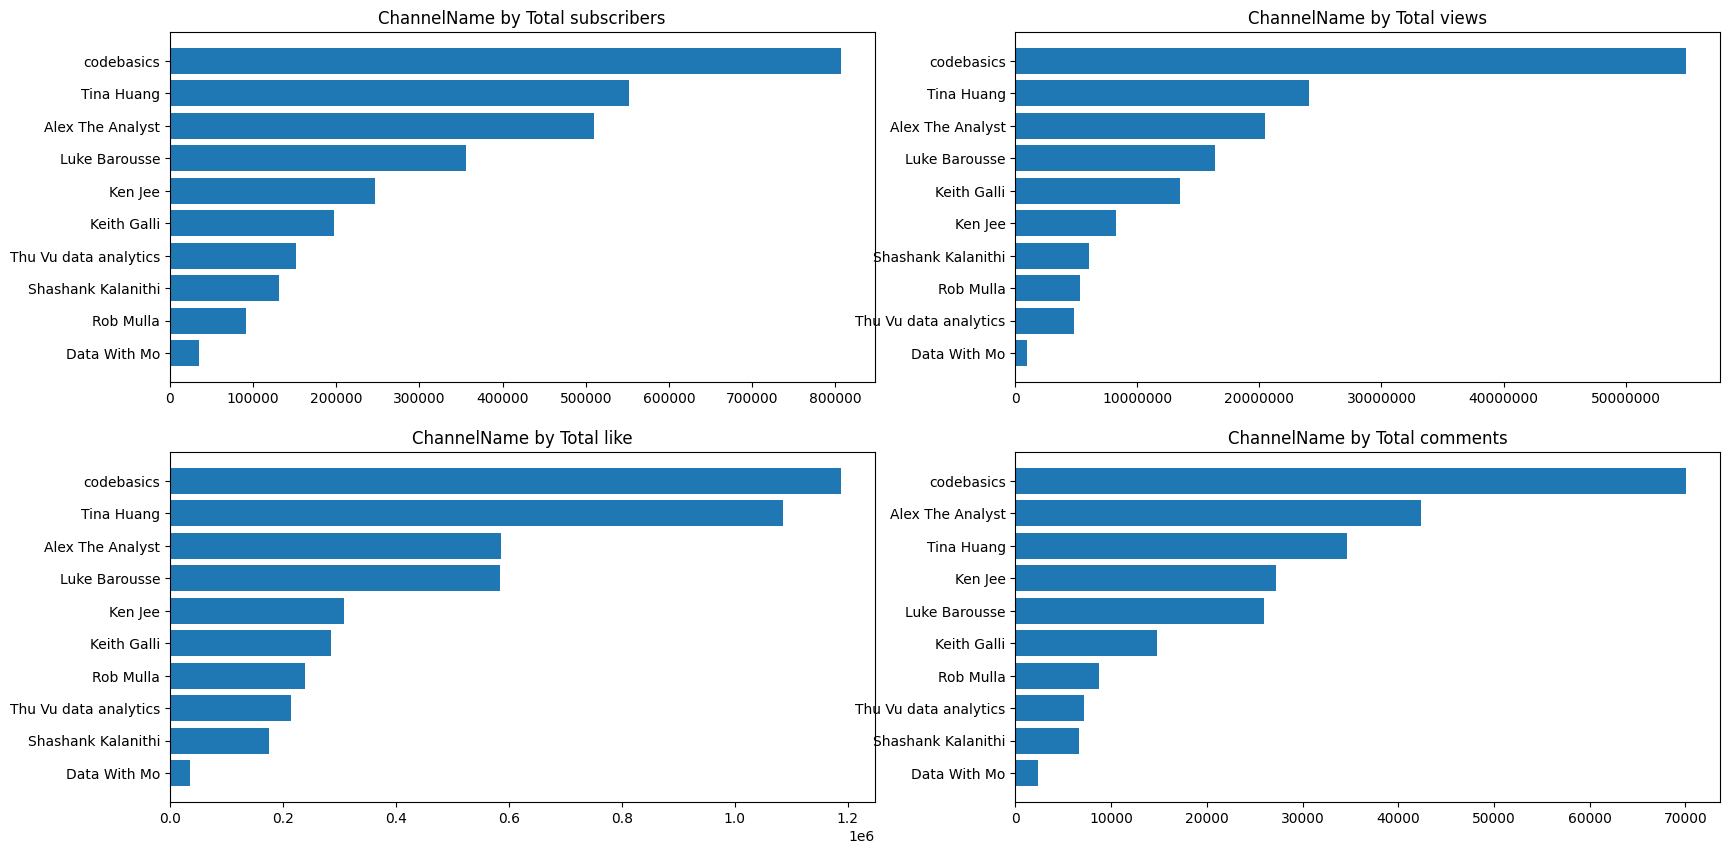

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs[0, 0].barh(y='channelName', width='subscribers', data=channel_data.sort_values('subscribers', ascending=True))
axs[0, 0].set_title('ChannelName by Total subscribers')
axs[0, 1].barh(y='channelName', width='views', data=channel_data.sort_values('views', ascending=True))
axs[0, 1].ticklabel_format(style='plain', axis='x')
axs[0, 1].set_title('ChannelName by Total views')
axs[1, 0].barh(y='channelName', width='likeCount', data=channel_data.sort_values('likeCount', ascending=True))
axs[1, 0].set_title('ChannelName by Total like')
axs[1, 1].barh(y='channelName', width='commentCount', data=channel_data.sort_values('commentCount', ascending=True))
axs[1, 1].set_title('ChannelName by Total comments')
plt.show()

Oldness

In [35]:
channel_data[['channelName','firstVideoPushblisedAt']].sort_values(by='firstVideoPushblisedAt')

channelName firstVideoPushblisedAt
0             codebasics                   2015
5            Keith Galli                   2016
4                Ken Jee                   2017
1             Tina Huang                   2020
2       Alex The Analyst                   2020
3          Luke Barousse                   2020
7     Shashank Kalanithi                   2020
6  Thu Vu data analytics                   2021
8              Rob Mulla                   2021
9           Data With Mo                   2023

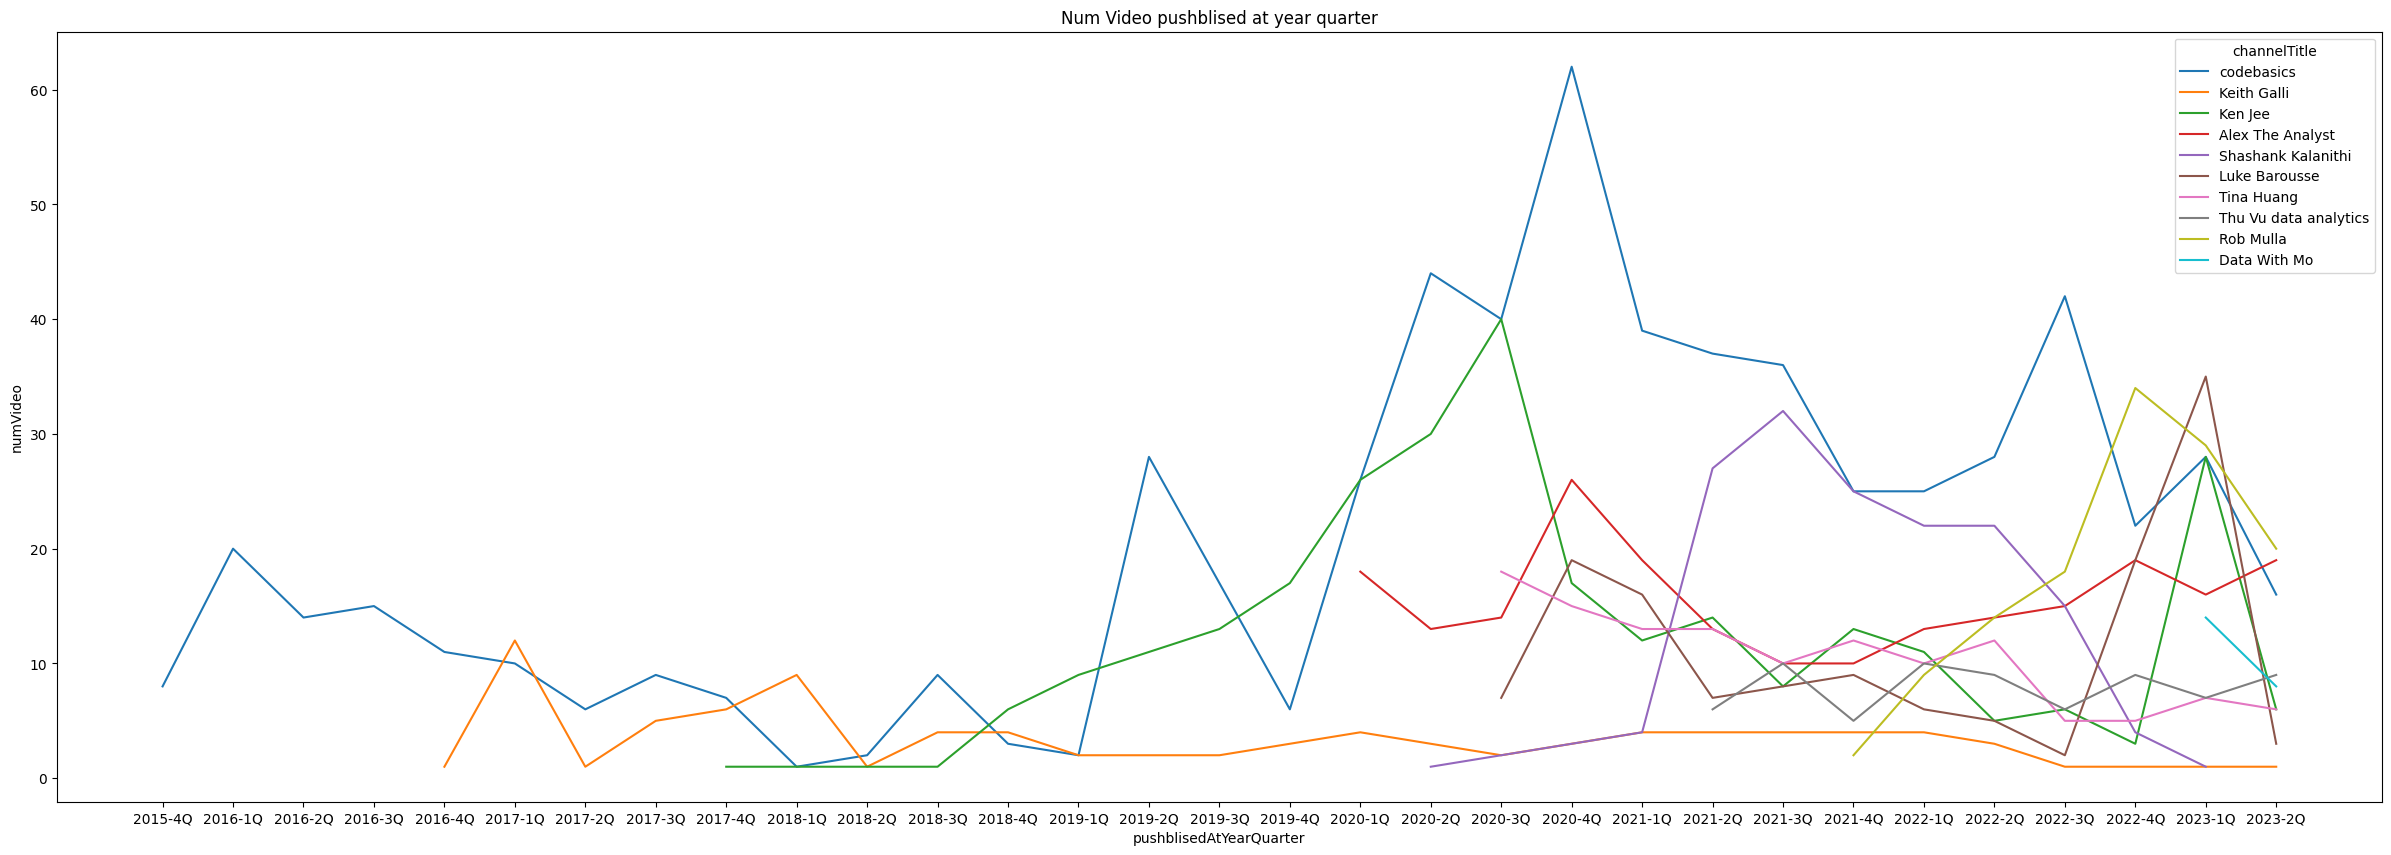

In [36]:
fig= plt.subplots(1, figsize=(30, 10))
graph = sns.lineplot(x='pushblisedAtYearQuarter', y='numVideo', data=video_df.groupby(['pushblisedAtYearQuarter', 'channelTitle'])['numVideo'].sum().reset_index(), hue='channelTitle')
graph.set_title('Num Video pushblised at year quarter')
plt.show()

Videos uploaded

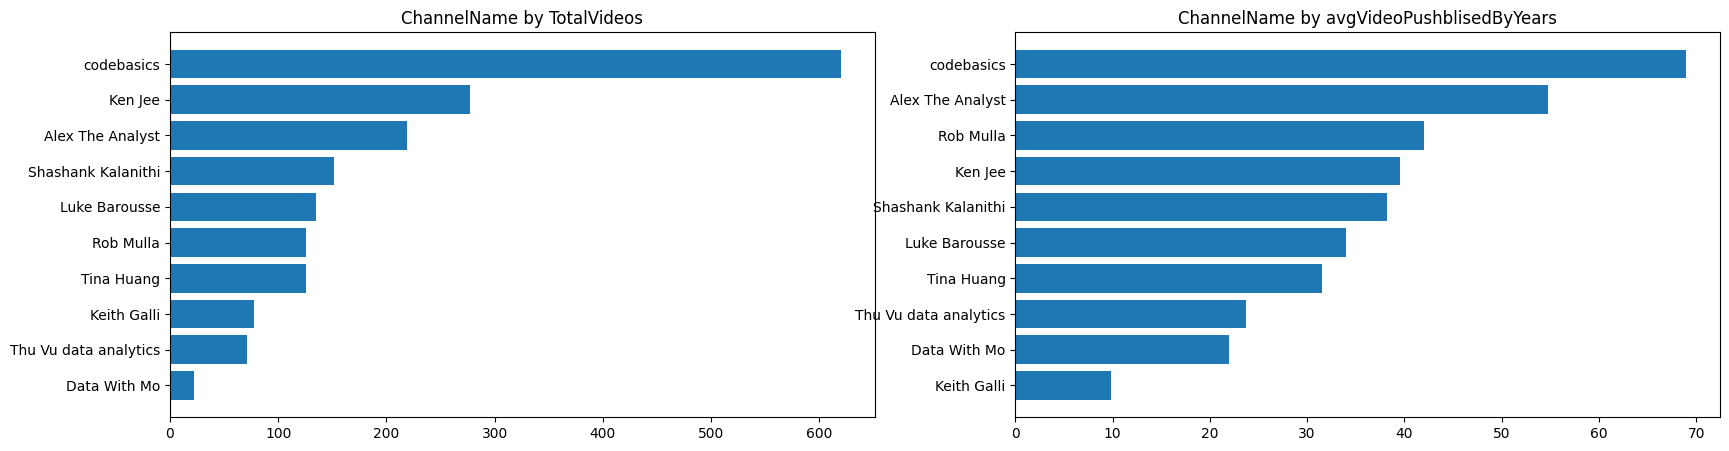

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].barh(y='channelName', width='totalVideos', data=channel_data.sort_values('totalVideos', ascending=True))
axs[0].set_title('ChannelName by TotalVideos')
axs[1].barh(y='channelName', width='avgVideoPushblisedByYears', data=channel_data.sort_values('avgVideoPushblisedByYears', ascending=True))
axs[1].ticklabel_format(style='plain', axis='x')
axs[1].set_title('ChannelName by avgVideoPushblisedByYears')
plt.show()

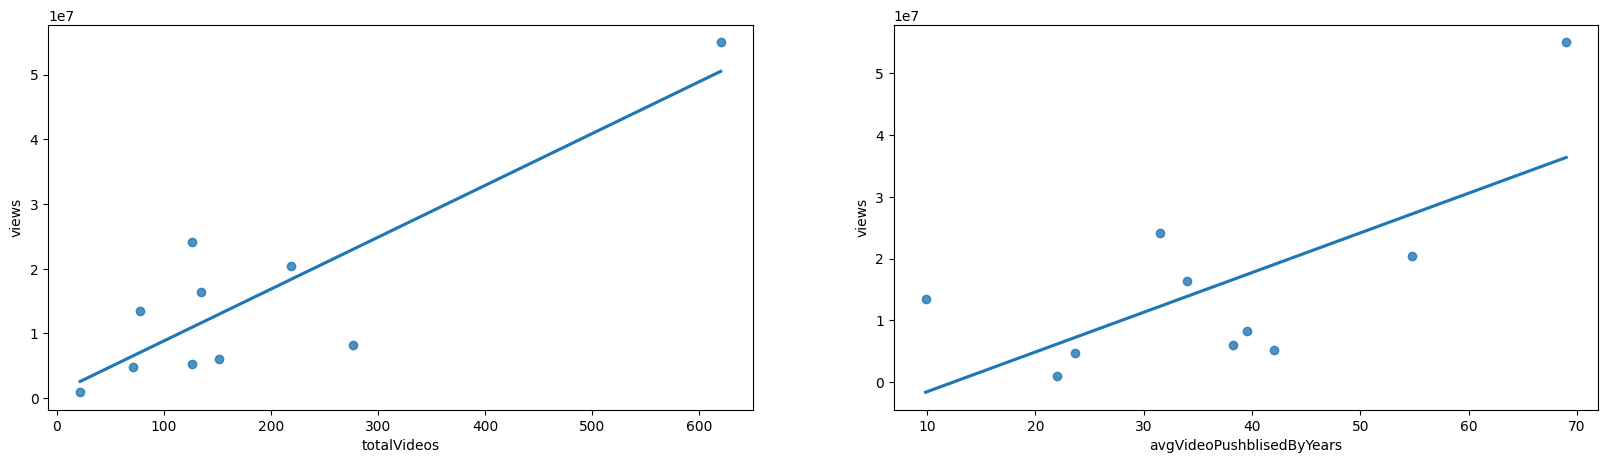

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.regplot(x="totalVideos", y="views", data=channel_data, ci=None, ax=axs[0])
sns.regplot(x="avgVideoPushblisedByYears", y="views", data=channel_data, ci=None, ax=axs[1])
plt.show()

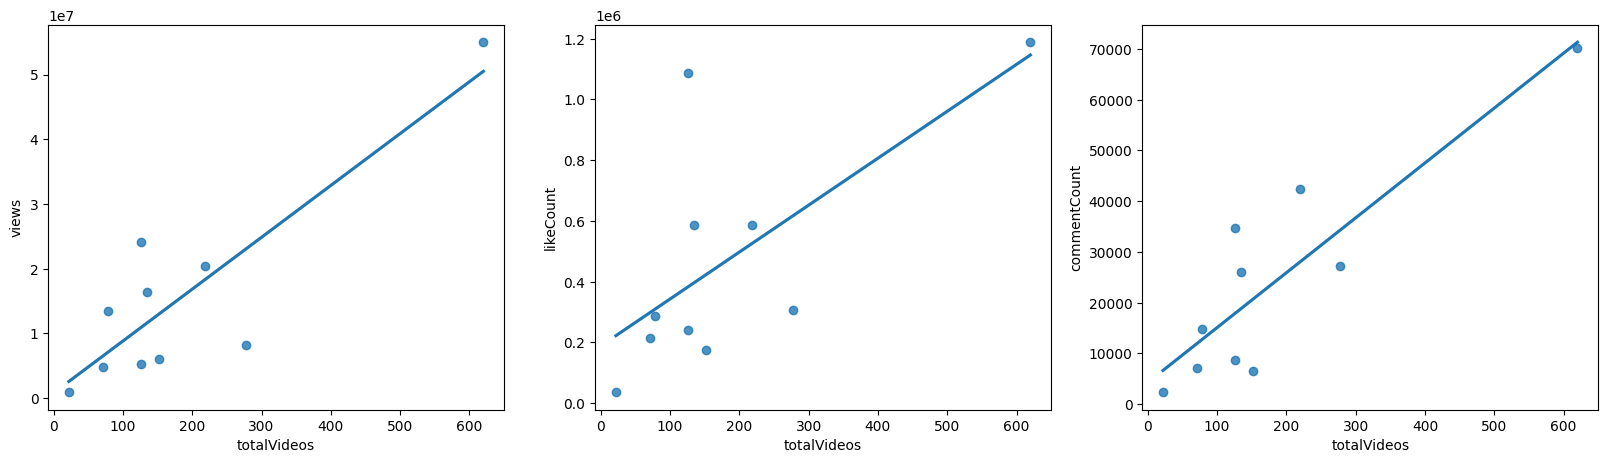

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.regplot(x="totalVideos", y="views", data=channel_data, ci=None, ax=axs[0])
sns.regplot(x="totalVideos", y="likeCount", data=channel_data, ci=None, ax=axs[1])
sns.regplot(x="totalVideos", y="commentCount", data=channel_data, ci=None, ax=axs[2])
plt.show()

Subscribers

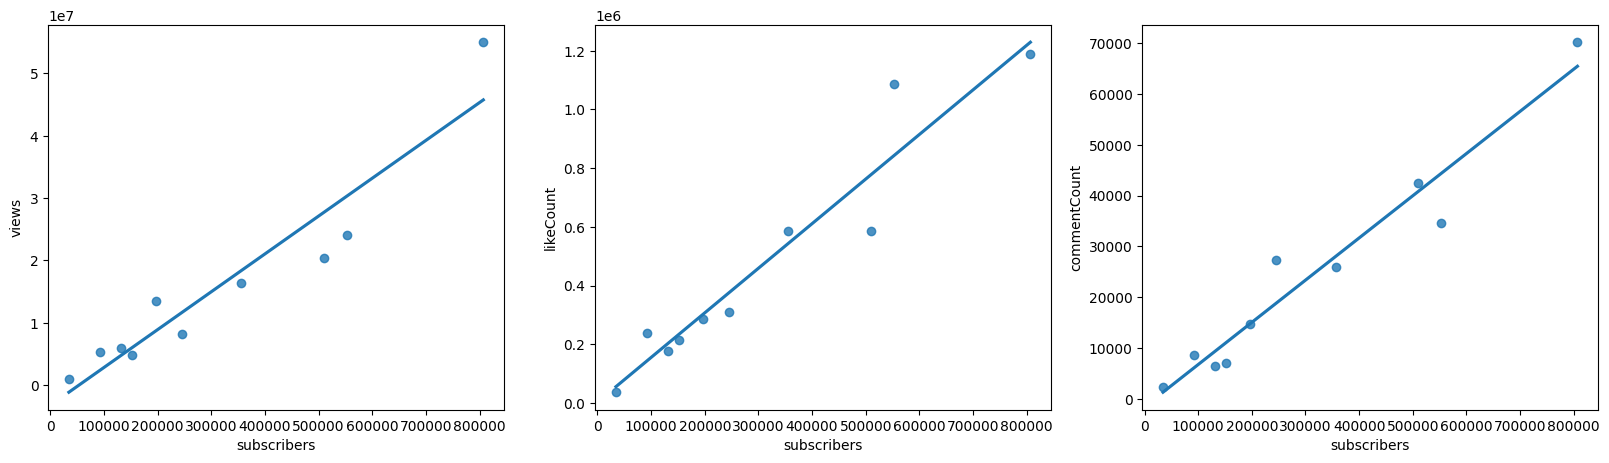

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.regplot(x="subscribers", y="views", data=channel_data, ci=None, ax=axs[0])
sns.regplot(x="subscribers", y="likeCount", data=channel_data, ci=None, ax=axs[1])
sns.regplot(x="subscribers", y="commentCount", data=channel_data, ci=None, ax=axs[2])
plt.show()

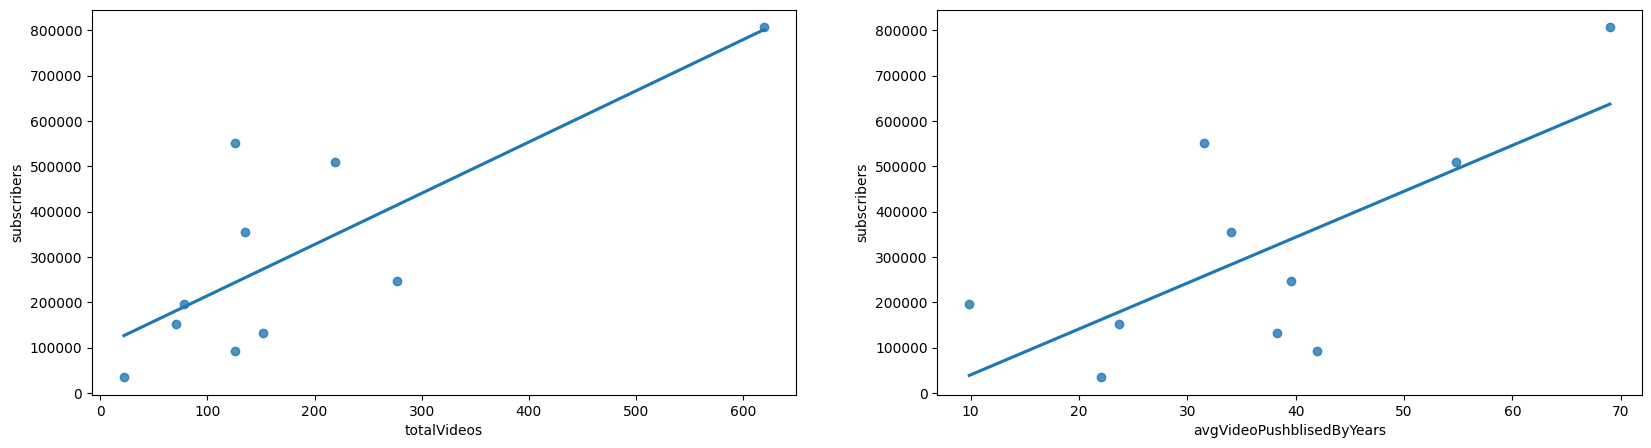

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.regplot(x="totalVideos", y="subscribers", data=channel_data, ci=None, ax=axs[0])
sns.regplot(x="avgVideoPushblisedByYears", y="subscribers", data=channel_data, ci=None, ax=axs[1])
plt.show()

Effort

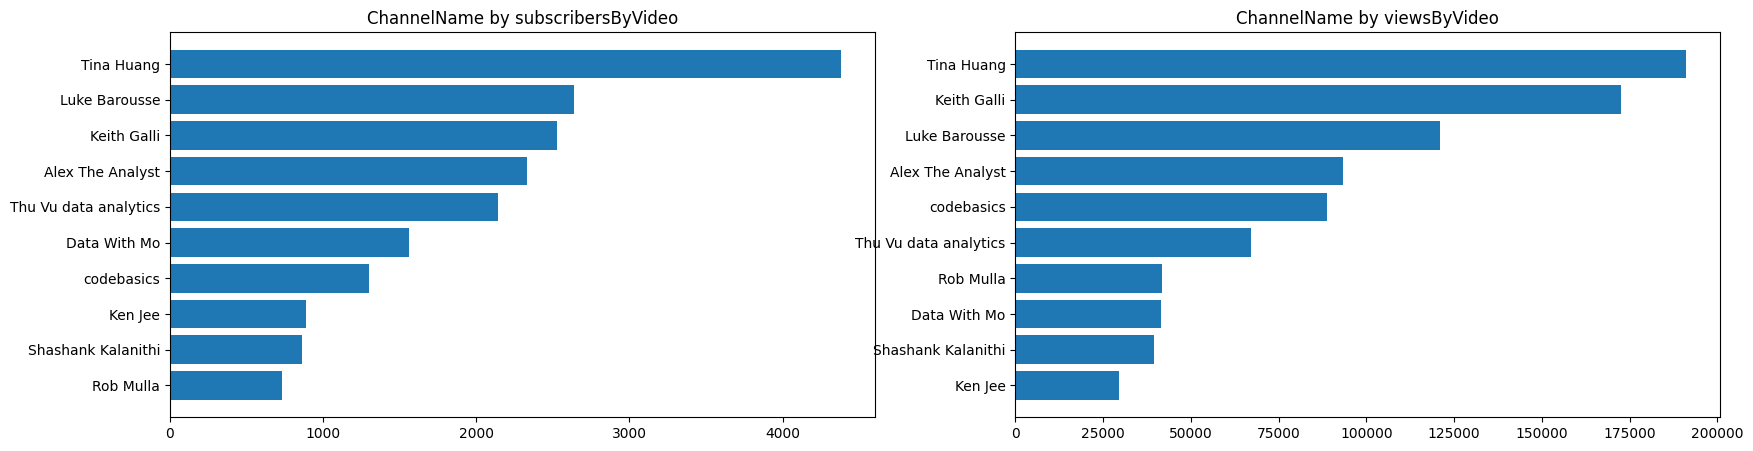

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].barh(y='channelName', width='subscribersByVideo', data=channel_data.sort_values('subscribersByVideo', ascending=True))
axs[0].set_title('ChannelName by subscribersByVideo')
axs[1].barh(y='channelName', width='viewsByVideo', data=channel_data.sort_values('viewsByVideo', ascending=True))
axs[1].ticklabel_format(style='plain', axis='x')
axs[1].set_title('ChannelName by viewsByVideo')
plt.show()

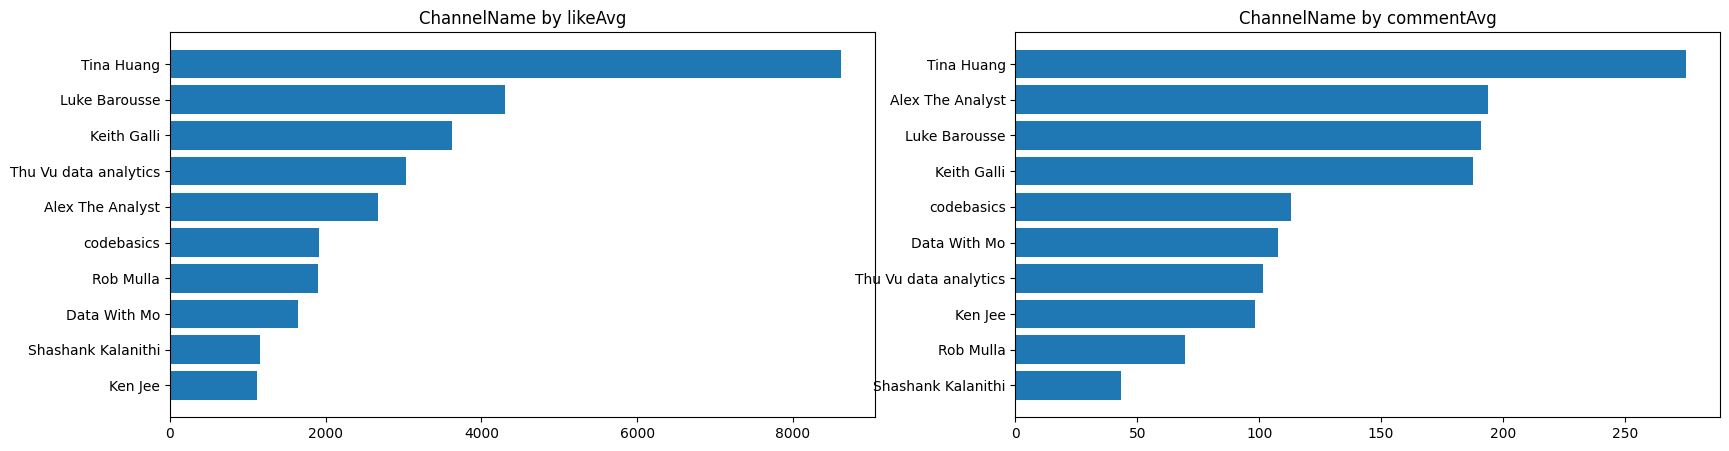

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].barh(y='channelName', width='likeAvg', data=channel_data.sort_values('likeAvg', ascending=True))
axs[0].set_title('ChannelName by likeAvg')
axs[1].barh(y='channelName', width='commentAvg', data=channel_data.sort_values('commentAvg', ascending=True))
axs[1].ticklabel_format(style='plain', axis='x')
axs[1].set_title('ChannelName by commentAvg')
plt.show()

Potential to grow

<Axes: xlabel='channelName', ylabel='AvgViewsBySubscribersYearly'>

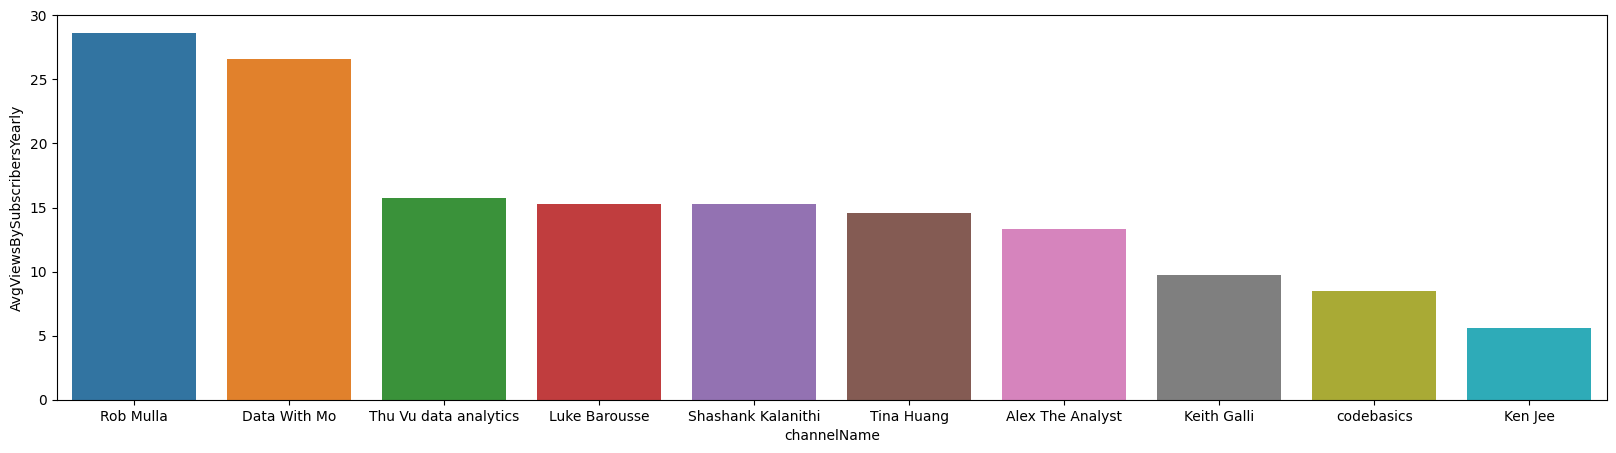

In [44]:
fig= plt.subplots(1, figsize=(20, 5))
sns.barplot(x='channelName', y='AvgViewsBySubscribersYearly', data=channel_data.sort_values('AvgViewsBySubscribersYearly', ascending=False))

### Dataframe video statistics

#### Trends

Since when first videos start to be pushblised, the video uploading increased drastically since 1Q 2020 when most content creators started to make videos. During the 2021 and 2022 the video uploading were stable. Then in 1Q 2023 there is a big growth due to diffusion of topics like AI and ChatGPT. At end, there is a significant decreas in youtube video production in 2Q 2023.

Observing views, likes and comments trends we note they seem to be have similar way to proceed, also they are strictly linked with the video productions.

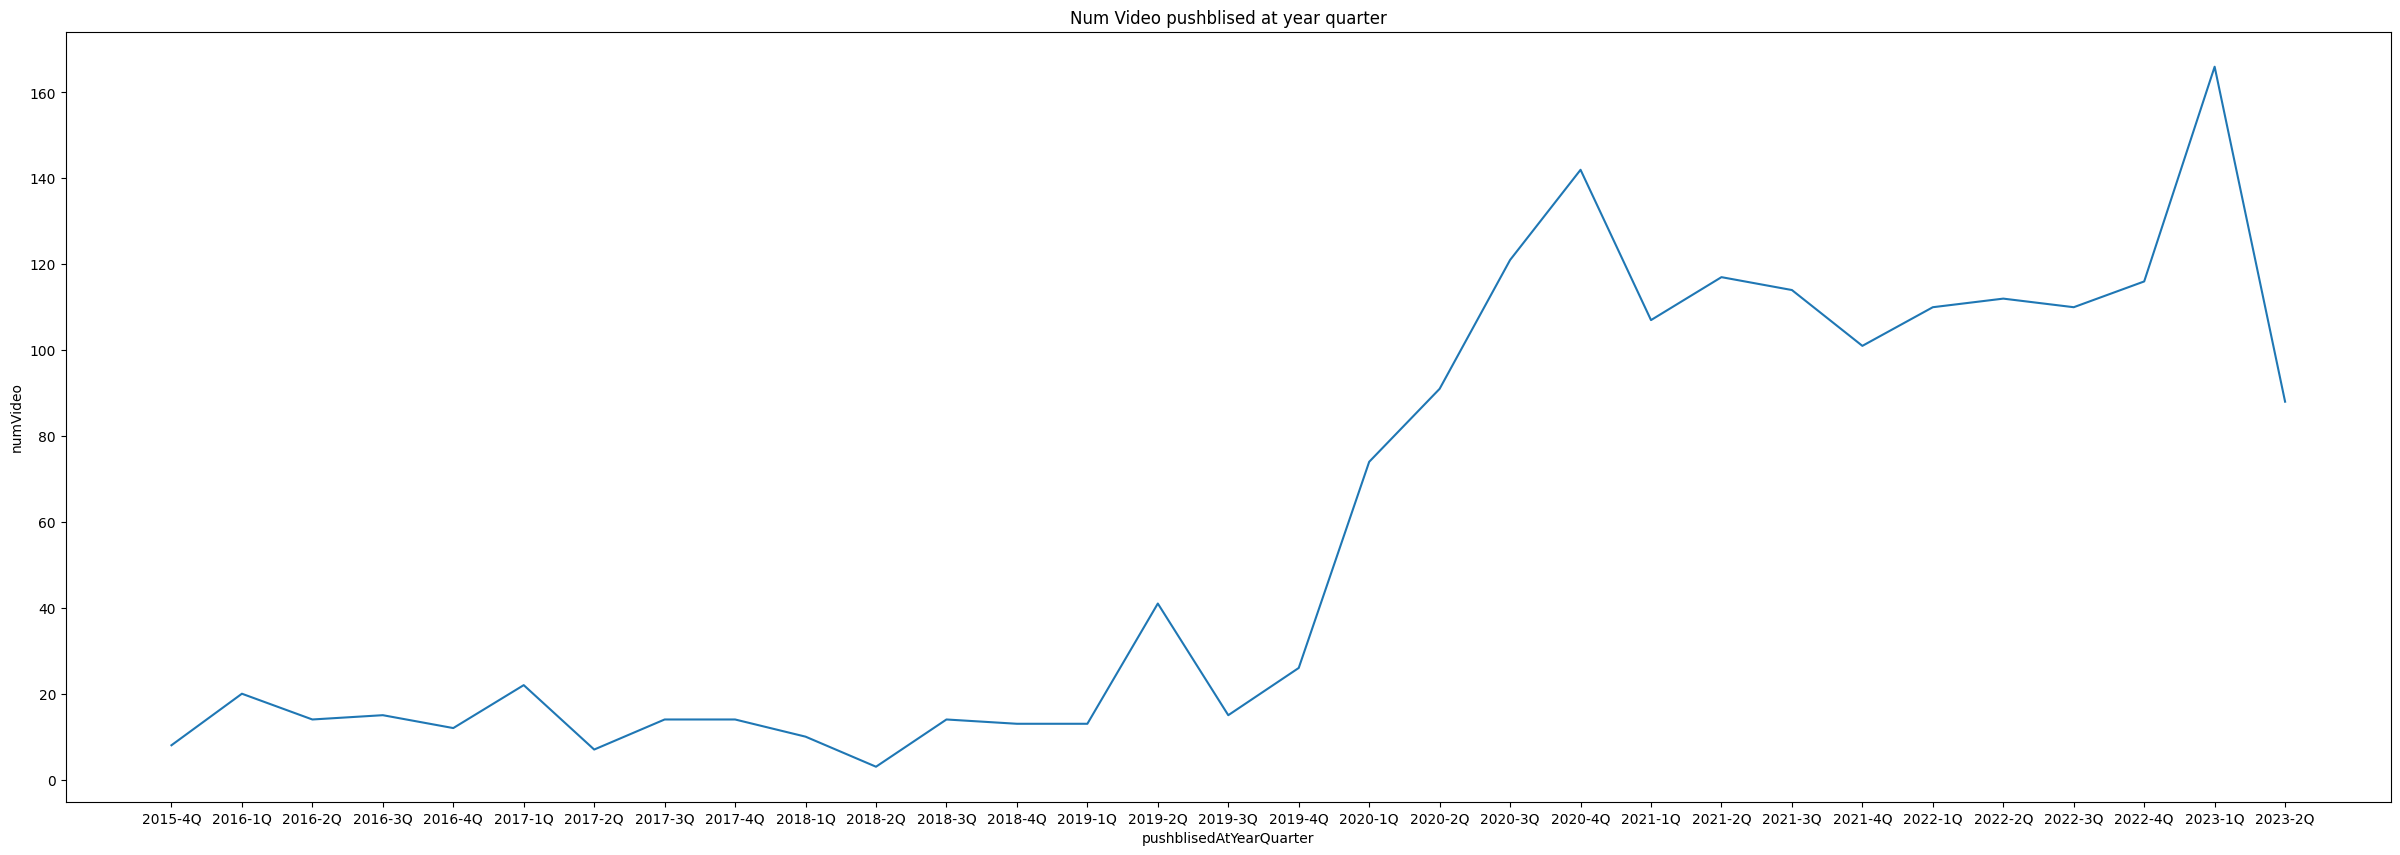

In [45]:
fig= plt.subplots(1, figsize=(30, 10))
graph = sns.lineplot(x='pushblisedAtYearQuarter', y='numVideo', data=video_df.groupby('pushblisedAtYearQuarter')['numVideo'].sum().reset_index())
graph.set_title('Num Video pushblised at year quarter')
plt.show()

In [46]:
channel_data[['channelName','firstVideoPushblisedAt']].sort_values(by='firstVideoPushblisedAt')

channelName firstVideoPushblisedAt
0             codebasics                   2015
5            Keith Galli                   2016
4                Ken Jee                   2017
1             Tina Huang                   2020
2       Alex The Analyst                   2020
3          Luke Barousse                   2020
7     Shashank Kalanithi                   2020
6  Thu Vu data analytics                   2021
8              Rob Mulla                   2021
9           Data With Mo                   2023

In [47]:
# check how many video contains string as 'AI' and 'GPT'
video_df[video_df['title'].str.contains('AI') | video_df['title'].str.contains('GPT')].shape[0]

68

In [48]:
# check how many video contains string as 'AI' and 'GPT'
(video_df[video_df['title'].str.contains('AI') | video_df['title'].str.contains('GPT')]).groupby('pushblisedAtYearQuarter')['numVideo'].sum()[-6:]

pushblisedAtYearQuarter
2022-1Q     2
2022-2Q     2
2022-3Q     7
2022-4Q     6
2023-1Q    10
2023-2Q    26
Name: numVideo, dtype: int64

The charts below show viewCount, likeCount, commentCount of video by publication date (grouped by quarters). The most succesful video were pushblised from 1Q 2020 to 1Q 2022.

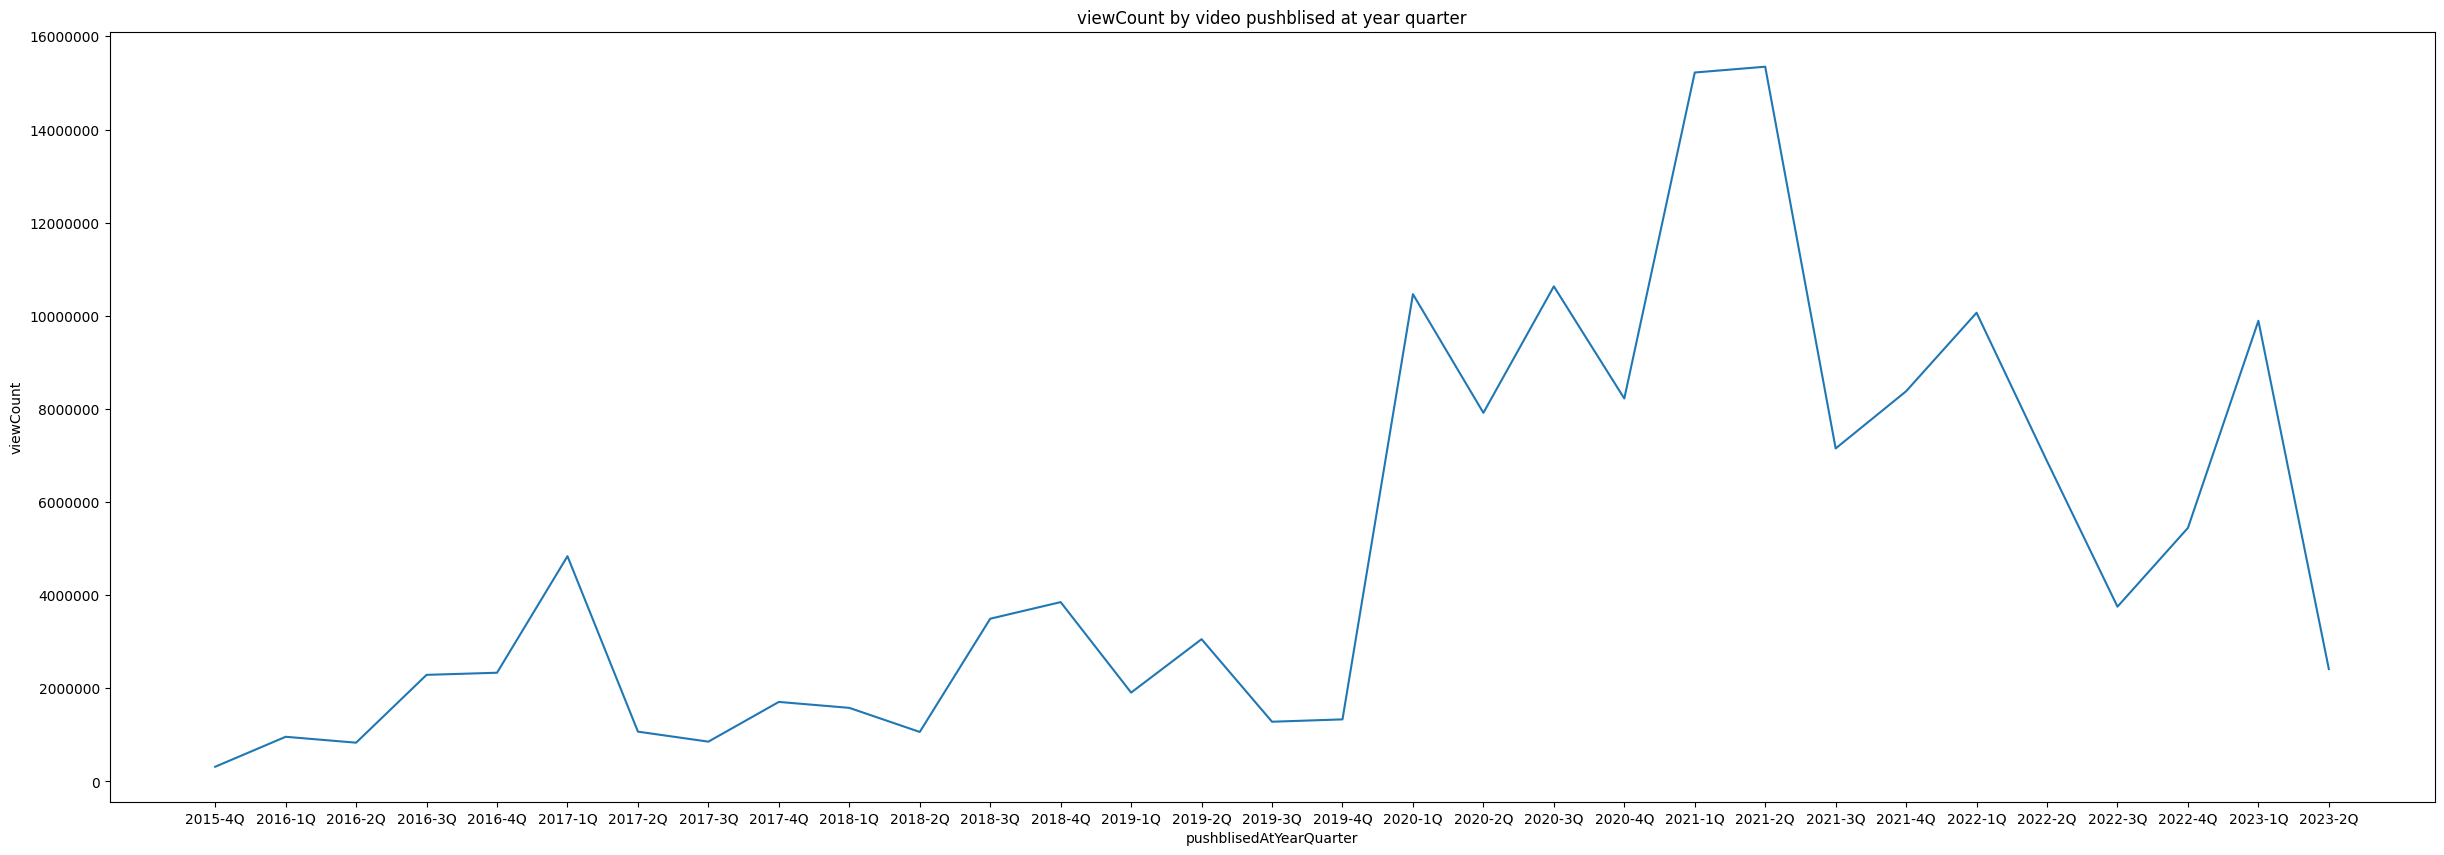

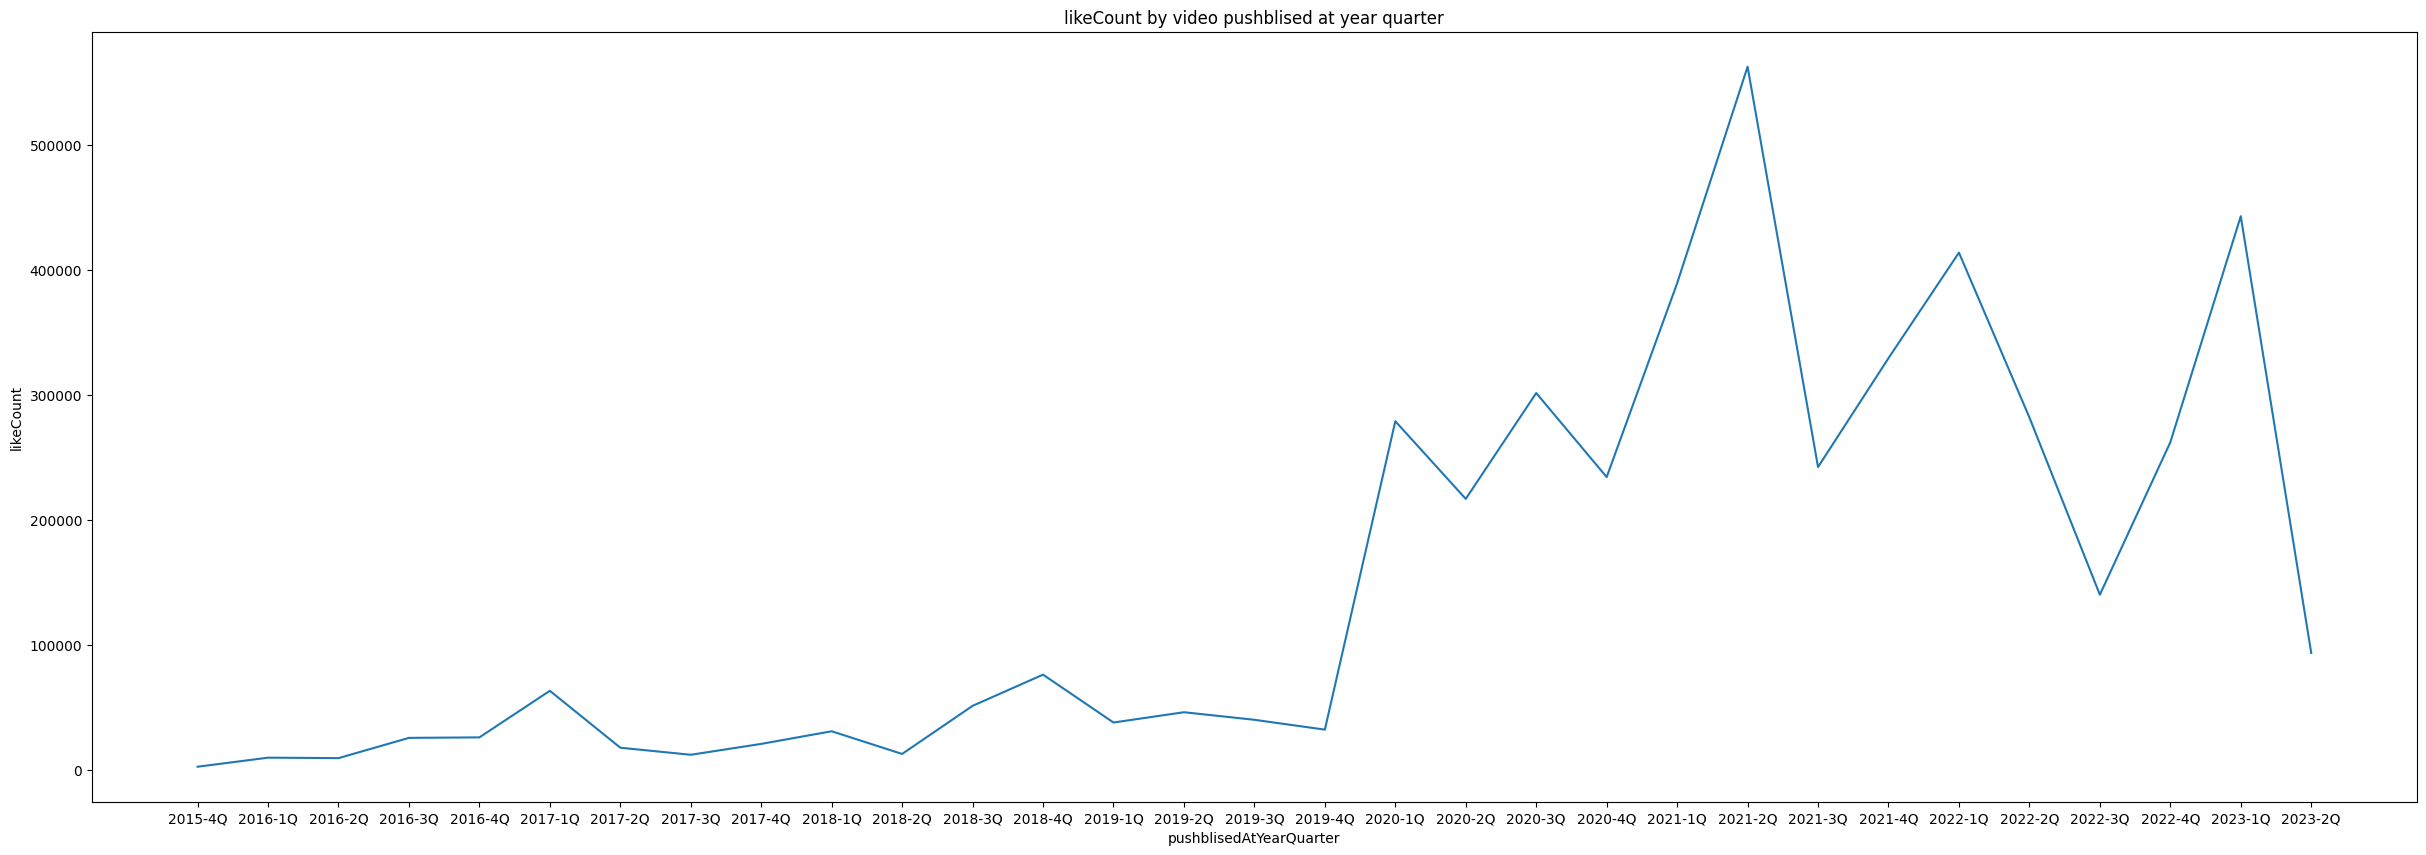

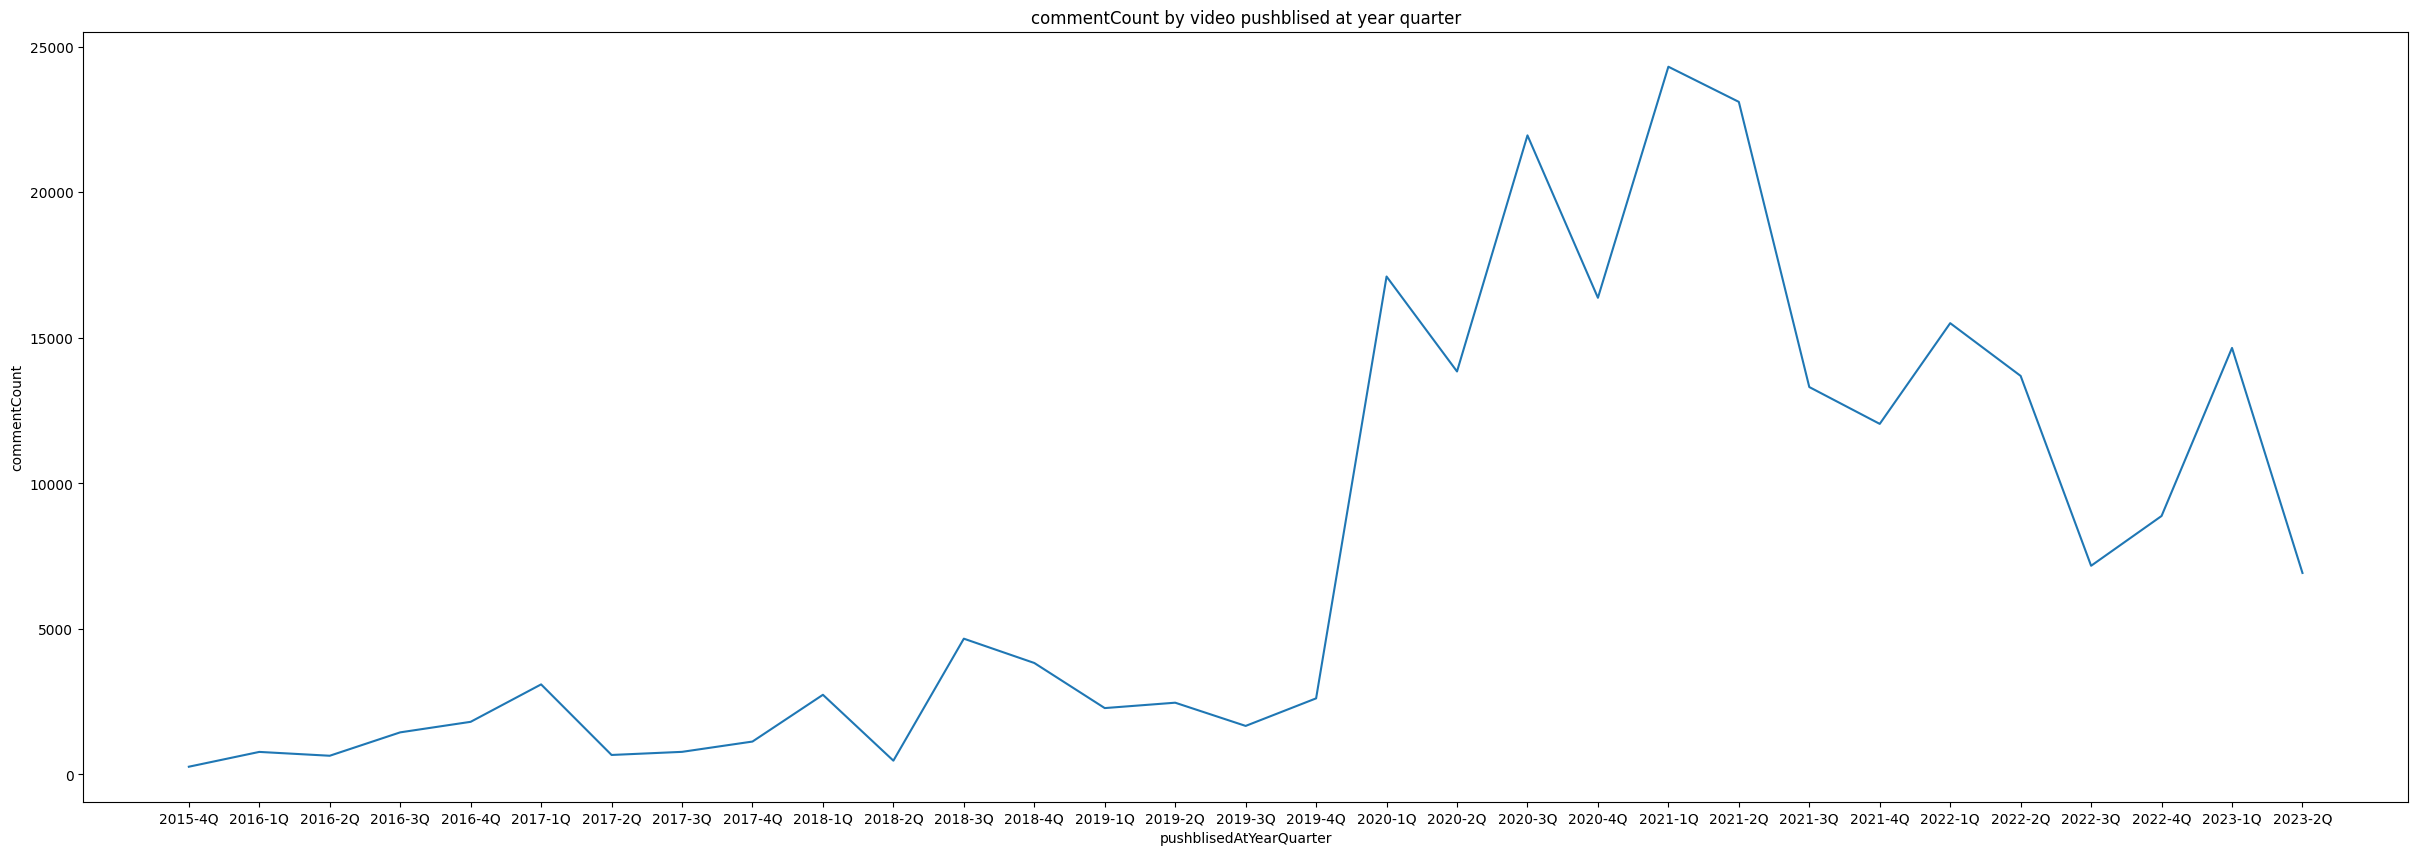

In [49]:
fig= plt.subplots(1, figsize=(30, 10))
graph = sns.lineplot(x='pushblisedAtYearQuarter', y='viewCount', data=video_df.groupby('pushblisedAtYearQuarter')['viewCount'].sum().reset_index())
graph.ticklabel_format(style='plain', axis='y')
graph.set_title('viewCount by video pushblised at year quarter')

fig= plt.subplots(1, figsize=(30, 10))
graph = sns.lineplot(x='pushblisedAtYearQuarter', y='likeCount', data=video_df.groupby('pushblisedAtYearQuarter')['likeCount'].sum().reset_index())
graph.ticklabel_format(style='plain', axis='y')
graph.set_title('likeCount by video pushblised at year quarter')
plt.show()

fig= plt.subplots(1, figsize=(30, 10))
graph = sns.lineplot(x='pushblisedAtYearQuarter', y='commentCount', data=video_df.groupby('pushblisedAtYearQuarter')['commentCount'].sum().reset_index())
graph.ticklabel_format(style='plain', axis='y')
graph.set_title('commentCount by video pushblised at year quarter')
plt.show()

As video posting has become significant since 2020, so we no longer consider videos posted before.

In [50]:
# filter video_df with videos pushblised since 2020
video_df = video_df[video_df['pushblisedAtYear'].isin([2020, 2021, 2022, 2023])]

In [51]:
video_df.shape

(1569, 22)

#### What characteristics has to have a video to performs well?

##### Timetable

During the first months of the year most videos are published, the most viewed videos tend to be the ones pushblised on April. The 1st day of month seem to be the favorite ones by youtubers to upload videos, but the videos that get more views are the one that are published on 8th or 17th day of the month. In general videos are published most frequently on Tuesday and Friday, but the videos get more views when they are published on Wednesday and Sunday.

Text(0.5, 1.0, 'Mean viewCount')

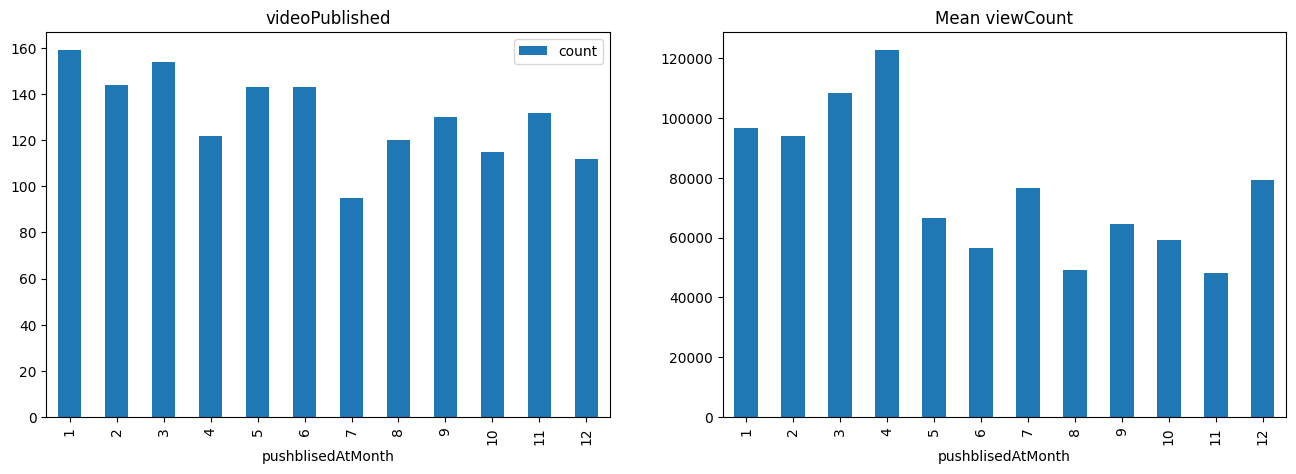

In [52]:
#year
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
video_df['pushblisedAtMonth'].value_counts().reset_index().sort_values(by='pushblisedAtMonth', ascending=True).set_index('pushblisedAtMonth').plot.bar(ax=axs[0])
video_df.groupby('pushblisedAtMonth')['viewCount'].mean().plot.bar(ax=axs[1])
axs[0].set_title('videoPublished')
axs[1].set_title('Mean viewCount')

Text(0.5, 1.0, 'Mean viewCount')

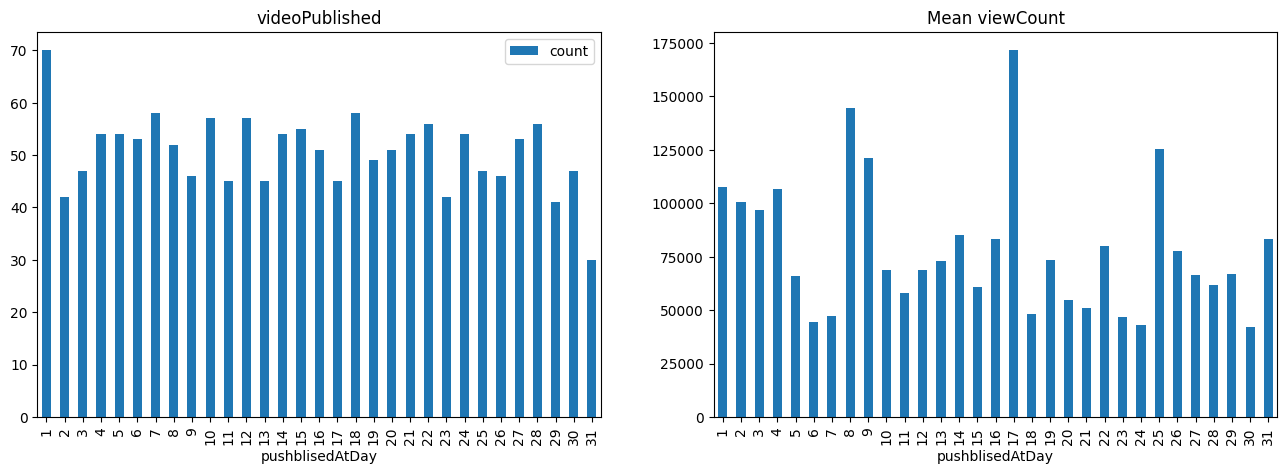

In [53]:
# month
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
video_df['pushblisedAtDay'].value_counts().reset_index().sort_values(by='pushblisedAtDay', ascending=True).set_index('pushblisedAtDay').plot.bar(ax=axs[0])
video_df.groupby('pushblisedAtDay')['viewCount'].mean().plot.bar(ax=axs[1])
axs[0].set_title('videoPublished')
axs[1].set_title('Mean viewCount')

Text(0.5, 1.0, 'Mean viewCount')

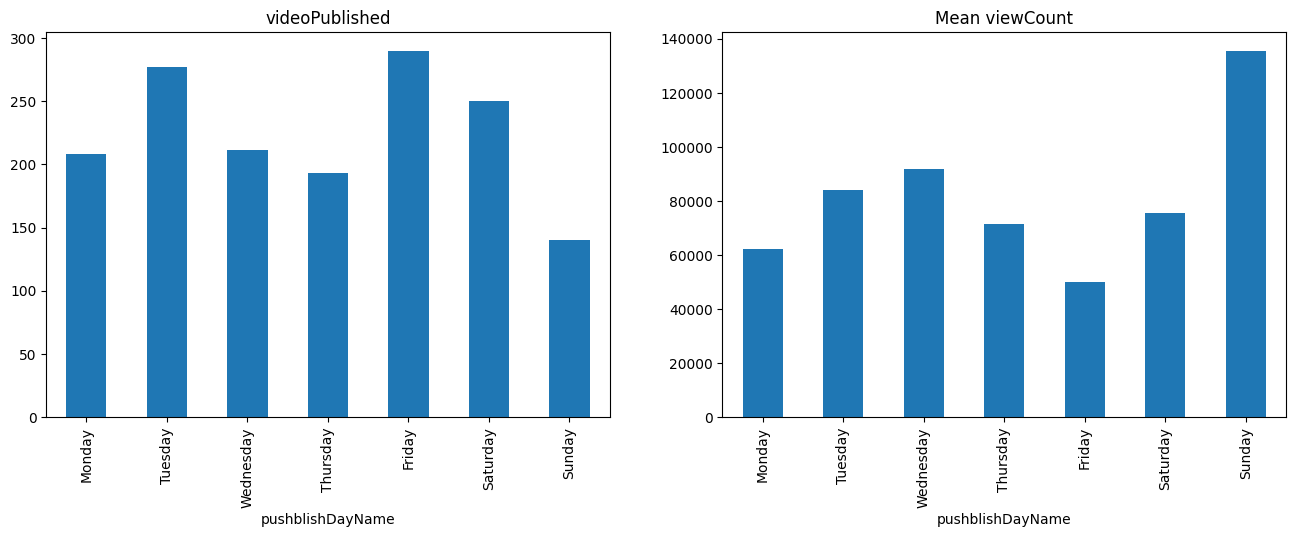

In [54]:
# week
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
video_df['pushblishDayName'].value_counts().reindex(weekdays).plot.bar(ax=axs[0])
video_df.groupby('pushblishDayName')['viewCount'].mean().reindex(weekdays).plot.bar(ax=axs[1])
axs[0].set_title('videoPublished')
axs[1].set_title('Mean viewCount')

##### Views, Like and Comments

Before I analysed some descriptive statistics, then I determined outliers and correlations, finally I defined how many likes and comment a video has to have to be a "successful video".

The `viewCount` variable has a stronger positive correlation with likes than comments and it has a broad distribution with high standard deviation. 

The `likeCount` variable and `commentCount` variable have a positive correlation between each other.

I assumed that "successful videos" are the ones with a least a number of views over third quartile. Considering that assumption, I calculated the mean of like and comment of these videos.

In [55]:
#descriptive stats
pd.options.display.float_format = '{:.2f}'.format
video_df[['viewCount','likeCount','commentCount']].describe()

viewCount  likeCount  commentCount
count    1569.00    1569.00       1569.00
mean    77614.98    2669.87        133.14
std    218271.89    8077.04        267.52
min         0.00       0.00          0.00
25%      7086.00     273.00         23.00
50%     21601.00     757.00         57.00
75%     68543.00    2163.00        144.00
max   4246068.00  181650.00       3799.00

In [56]:
# check correlation
video_df[['viewCount','likeCount','commentCount']].corr()

viewCount  likeCount  commentCount
viewCount          1.00       0.93          0.79
likeCount          0.93       1.00          0.74
commentCount       0.79       0.74          1.00

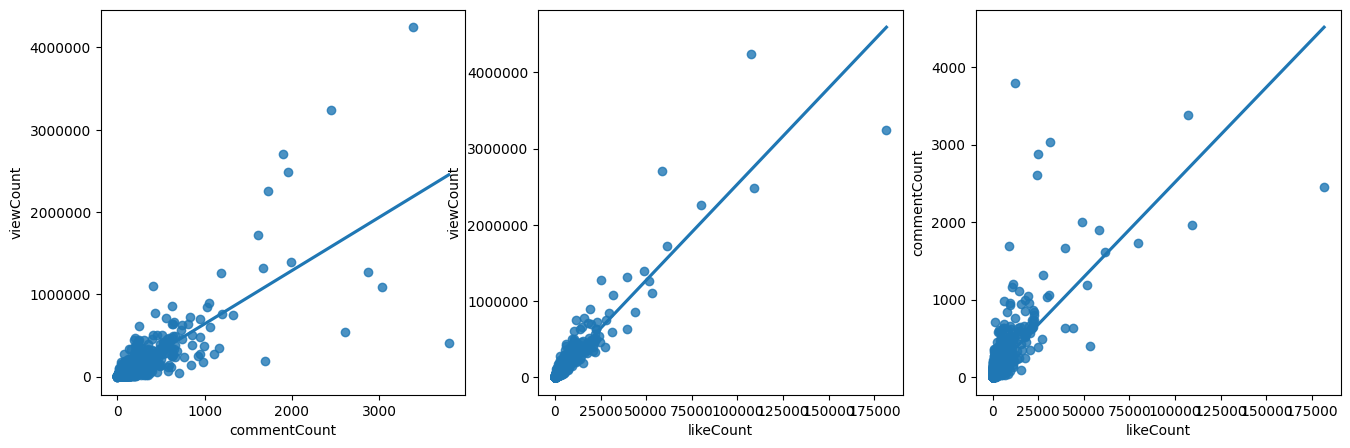

In [57]:
# check correlation
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
sns.regplot(data = video_df, x = "commentCount", y = "viewCount", ci=None, ax=axs[0])
sns.regplot(data = video_df, x = "likeCount", y = "viewCount", ci=None, ax=axs[1])
sns.regplot(data = video_df, x = "likeCount", y = "commentCount", ci=None, ax=axs[2])
axs[1].ticklabel_format(style='plain', axis='y')
axs[0].ticklabel_format(style='plain', axis='y')
plt.show()

<Axes: xlabel='commentCount'>

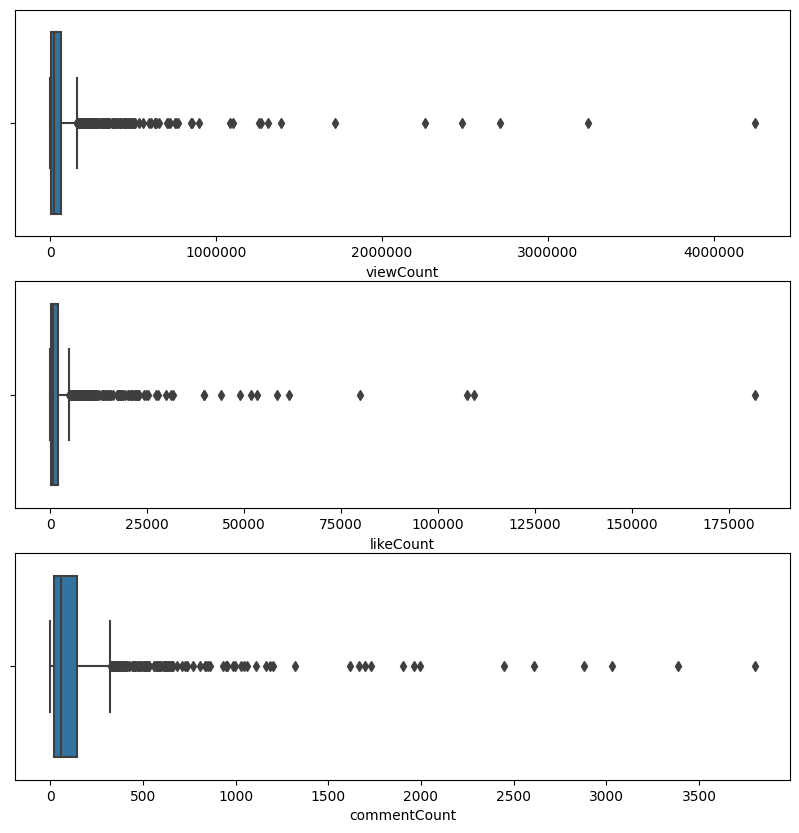

In [58]:
#check for outliers
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
sns.boxplot(data=video_df, x="viewCount", ax=axs[0])
axs[0].ticklabel_format(style='plain', axis='x')
sns.boxplot(data=video_df, x="likeCount", ax=axs[1])
sns.boxplot(data=video_df, x="commentCount", ax=axs[2])

In [59]:
#check for outliers
IQR_views = video_df['viewCount'].quantile(0.75) - video_df['viewCount'].quantile(0.25)
IQR_likes = video_df['likeCount'].quantile(0.75) - video_df['likeCount'].quantile(0.25)
IQR_comments = video_df['commentCount'].quantile(0.75) - video_df['commentCount'].quantile(0.25)

Views_lower_bound = (video_df['viewCount'].quantile(0.25) - 1.5*IQR_views)
Views_upper_bound = (video_df['viewCount'].quantile(0.75) + 1.5*IQR_views)
Likes_lower_bound = (video_df['likeCount'].quantile(0.25) - 1.5*IQR_likes)
Likes_upper_bound = (video_df['likeCount'].quantile(0.75) + 1.5*IQR_likes)
Comments_lower_bound = (video_df['commentCount'].quantile(0.25) - 1.5*IQR_comments)
Comments_upper_bound = (video_df['commentCount'].quantile(0.75) + 1.5*IQR_comments)

print('Views_lower_bound :', Views_lower_bound)
print('Views_upper_bound :', Views_upper_bound)
print('')
print('Likes_lower_bound :', Likes_lower_bound)
print('Likes_upper_bound :', Likes_upper_bound)
print('')
print('Comments_lower_bound :', Comments_lower_bound)
print('Comments_upper_bound :', Comments_upper_bound)

Views_lower_bound : -85099.5
Views_upper_bound : 160728.5

Likes_lower_bound : -2562.0
Likes_upper_bound : 4998.0

Comments_lower_bound : -158.5
Comments_upper_bound : 325.5


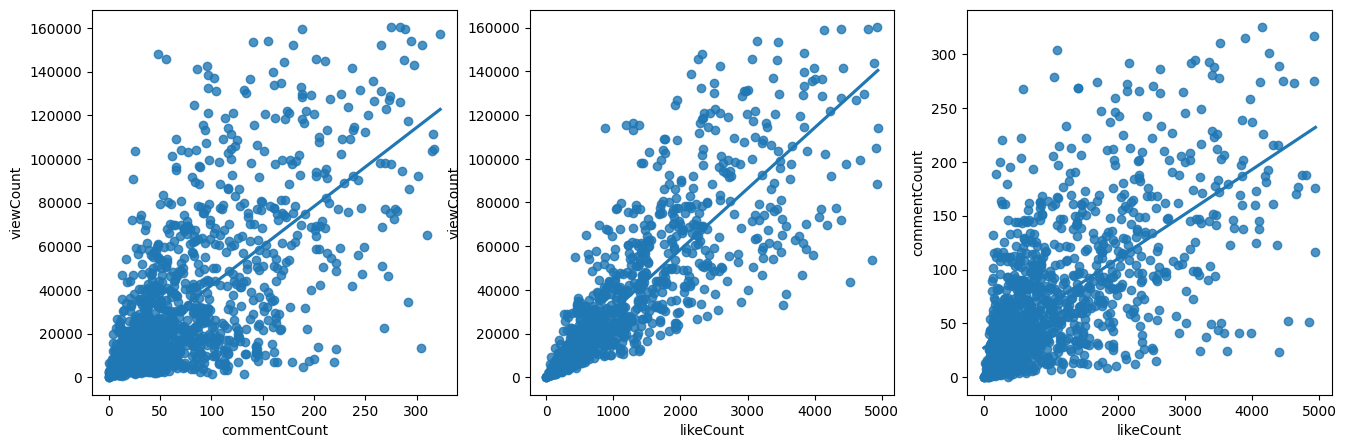

In [60]:
# because the lower bound is negative for all variables, which cannot get negative values, consider only upper bound to remove outliers
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
sns.regplot(data =video_df[(video_df['commentCount']<Comments_upper_bound)&(video_df['viewCount']<Views_upper_bound)], x = "commentCount", y = "viewCount", ci=None, ax=axs[0])
sns.regplot(data = video_df[(video_df['likeCount']<Likes_upper_bound )&(video_df['viewCount']<Views_upper_bound)], x = "likeCount", y = "viewCount", ci=None, ax=axs[1])
sns.regplot(data = video_df[(video_df['likeCount']<Likes_upper_bound )&(video_df['commentCount']<Comments_upper_bound )], x = "likeCount", y = "commentCount", ci=None, ax=axs[2])
axs[1].ticklabel_format(style='plain', axis='y')
axs[0].ticklabel_format(style='plain', axis='y')
plt.show()

In [61]:
# check correlation without outliers
video_df[(video_df['commentCount']<Comments_upper_bound)&(video_df['viewCount']<Views_upper_bound)][['viewCount','commentCount']].corr()

viewCount  commentCount
viewCount          1.00          0.70
commentCount       0.70          1.00

In [62]:
# check correlation without outliers
video_df[(video_df['likeCount']<Likes_upper_bound )&(video_df['viewCount']<Views_upper_bound)][['likeCount','viewCount']].corr()

likeCount  viewCount
likeCount       1.00       0.86
viewCount       0.86       1.00

In [63]:
# check correlation without outliers
video_df[(video_df['likeCount']<Likes_upper_bound )&(video_df['commentCount']<Comments_upper_bound )][['likeCount','commentCount']].corr()

likeCount  commentCount
likeCount          1.00          0.66
commentCount       0.66          1.00

In [64]:
# check for likeCount mean in most viewed videos (video with views over 3rd quartile)
video_df[video_df['viewCount']>=video_df['viewCount'].quantile(0.75)]['likeCount'].mean()

8525.699745547074

In [65]:
# check for commentCount mean in most viewed videos (video with views over 3rd quartile)
video_df[video_df['viewCount']>=video_df['viewCount'].quantile(0.75)]['commentCount'].mean()

361.93384223918576

##### Duration

The most videos published have a duration less than 30 minutes (2.000 seconds). Also we note a particularly large group under 60 seconds which can be identified as the 'Youtube Short' category. So if we focus on videos with duration between 1 minute and 1 hour, we note they have an average of 13 minutes duration. Also, the median of the 'durationSecs' variable is about 13 minutes (783 seconds).

<Axes: xlabel='durationSecs'>

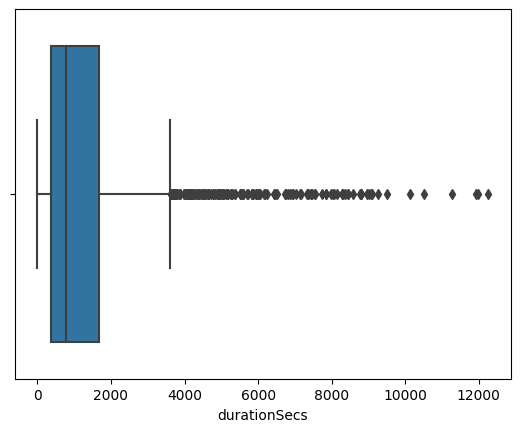

In [66]:
sns.boxplot(data=video_df, x="durationSecs")

<Axes: xlabel='durationSecs', ylabel='Count'>

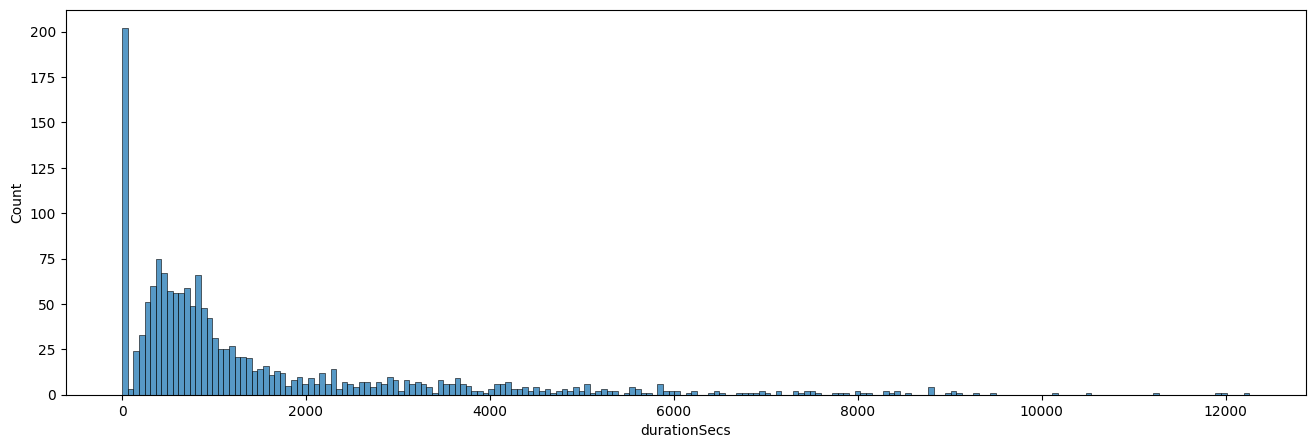

In [67]:
fig, axs = plt.subplots(1, 1, figsize=(16, 5))
sns.histplot(data=video_df, x="durationSecs", bins=200)

<Axes: xlabel='durationSecs', ylabel='Count'>

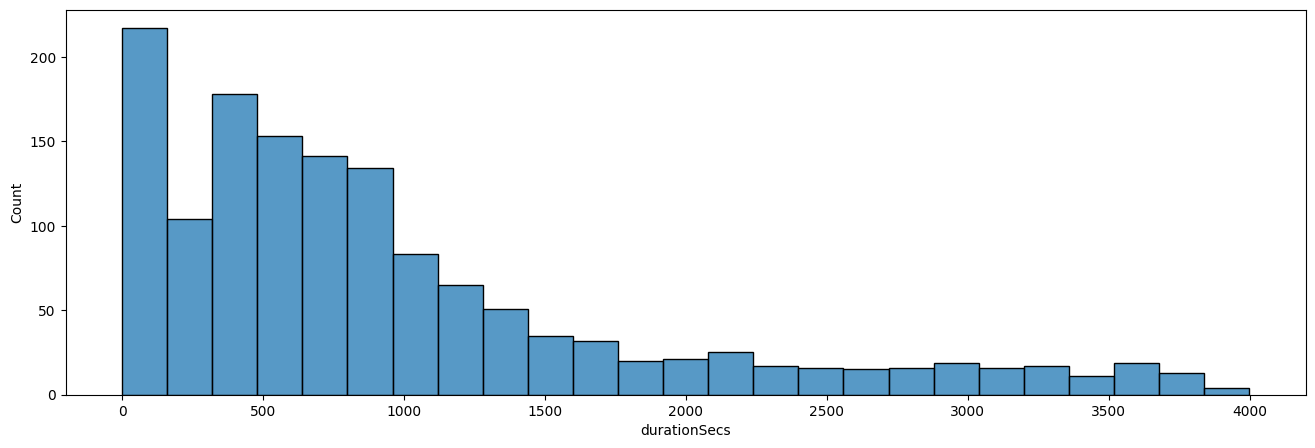

In [68]:
fig, axs = plt.subplots(1, 1, figsize=(16, 5))
sns.histplot(data=video_df[video_df['durationSecs']<4000], x="durationSecs", bins=25)

<Axes: xlabel='durationSecs', ylabel='Count'>

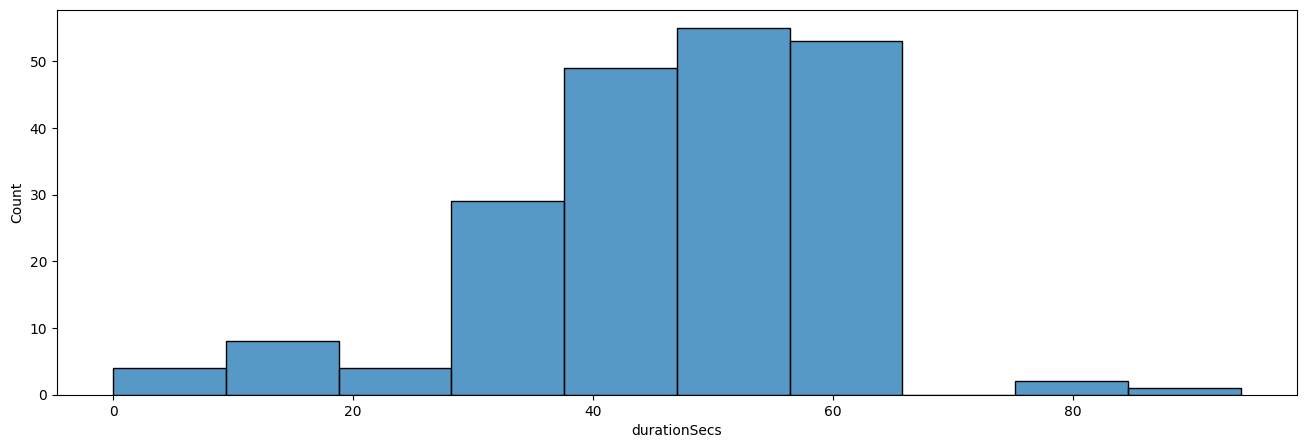

In [69]:
fig, axs = plt.subplots(1, 1, figsize=(16, 5))
sns.histplot(data=video_df[video_df['durationSecs']<100], x="durationSecs", bins=10)

In [70]:
video_df[(video_df['durationSecs']>60)&(video_df['durationSecs']<2000)]['durationSecs'].mean()/60

12.978053931124105

In [71]:
video_df['durationSecs'].describe()

count    1569.00
mean     1444.42
std      1806.85
min         0.00
25%       383.00
50%       785.00
75%      1678.00
max     12258.00
Name: durationSecs, dtype: float64

Shorter videos seem to have higher number of views, likes and comment than the longer ones. Keep in mind the most videos published have a duration less than 30 minutes in the dataframe. In general videos appear to be succesful when they have a duration about 750 seconds (12,5 minutes).

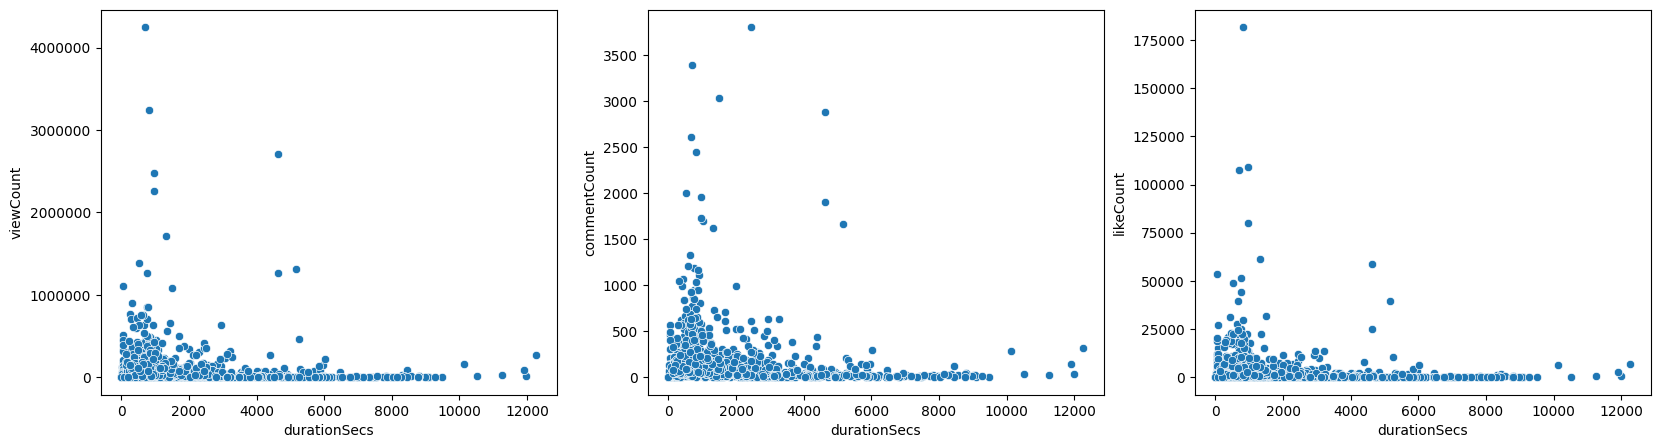

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.scatterplot(data = video_df, x = "durationSecs", y = "viewCount", ax=axs[0])
sns.scatterplot(data = video_df, x = "durationSecs", y = "commentCount", ax=axs[1])
sns.scatterplot(data = video_df, x = "durationSecs", y = "likeCount", ax=axs[2])
axs[0].ticklabel_format(style='plain', axis='y')
axs[1].ticklabel_format(style='plain', axis='y')
axs[2].ticklabel_format(style='plain', axis='y')
plt.show()

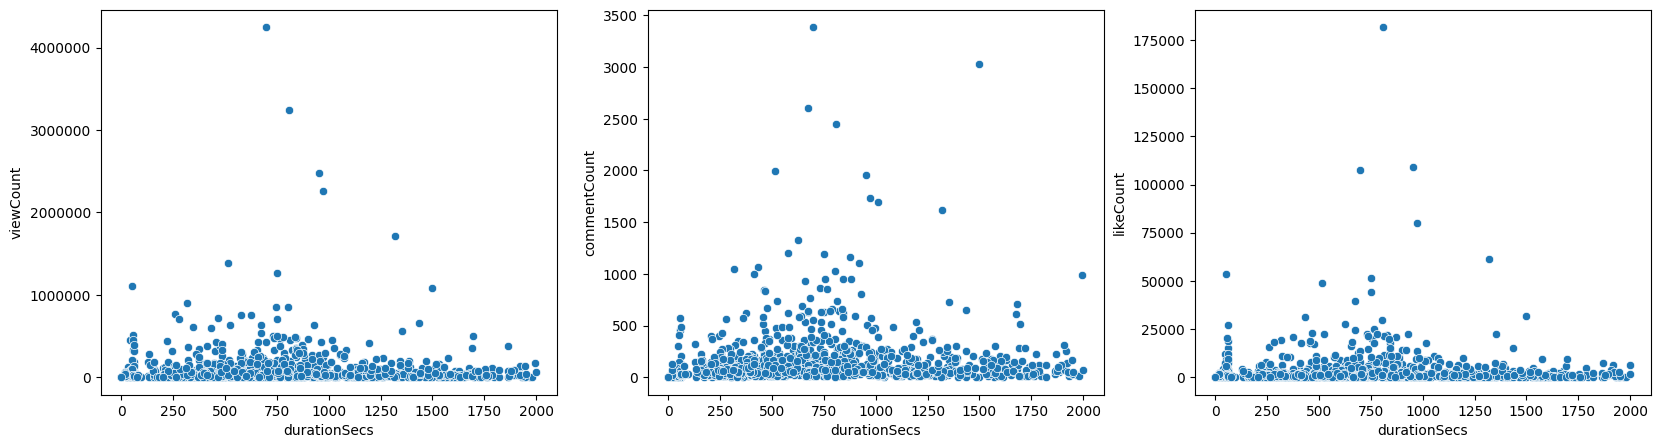

In [73]:
# only videos with duration less than 30 minutes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.scatterplot(data = video_df[video_df['durationSecs']<2000], x = "durationSecs", y = "viewCount", ax=axs[0])
sns.scatterplot(data = video_df[video_df['durationSecs']<2000], x = "durationSecs", y = "commentCount", ax=axs[1])
sns.scatterplot(data = video_df[video_df['durationSecs']<2000], x = "durationSecs", y = "likeCount", ax=axs[2])
axs[0].ticklabel_format(style='plain', axis='y')
axs[1].ticklabel_format(style='plain', axis='y')
axs[2].ticklabel_format(style='plain', axis='y')
plt.show()

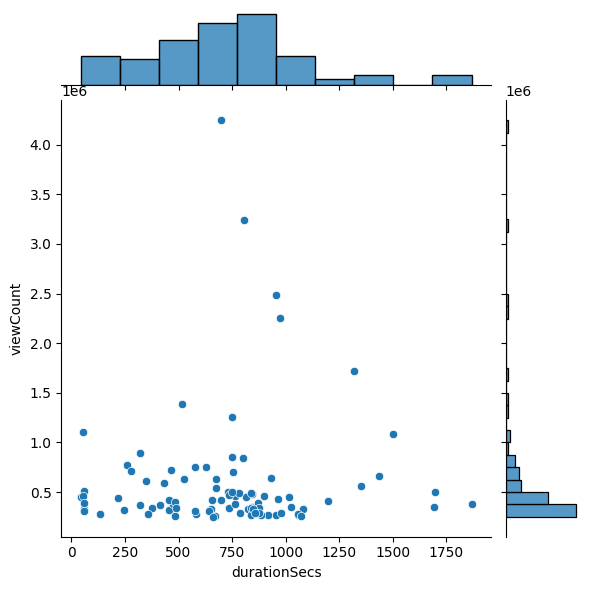

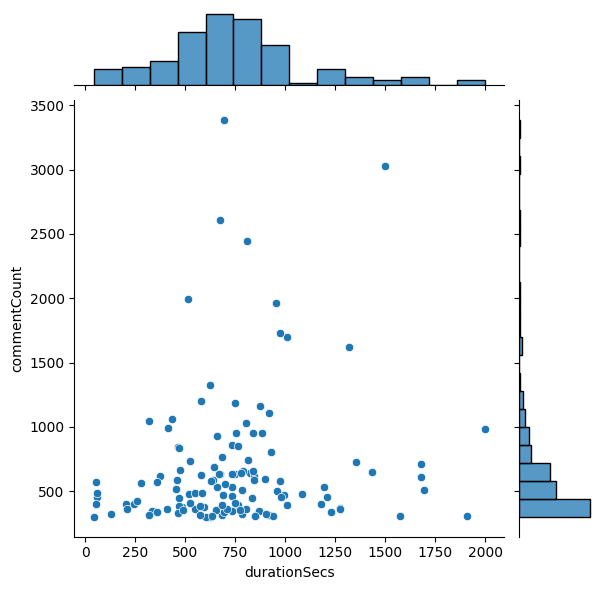

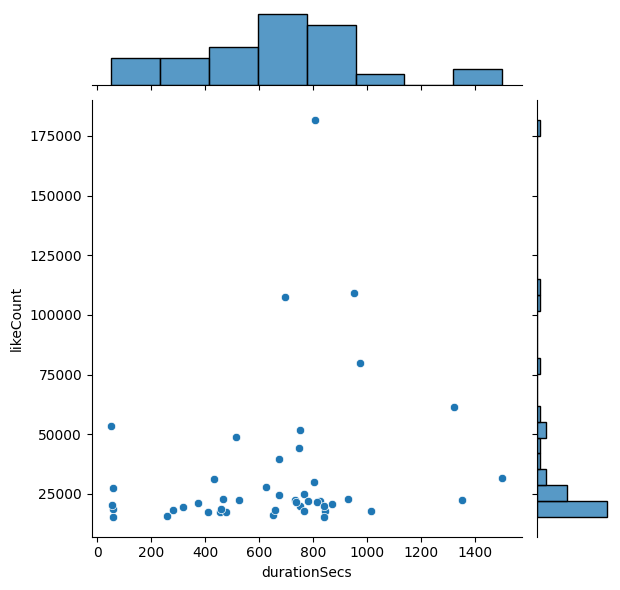

In [74]:
# most successful videos
sns.jointplot(data = video_df[(video_df['durationSecs']<2000) & (video_df['viewCount']>250000)], x = "durationSecs", y = "viewCount")
sns.jointplot(data = video_df[(video_df['durationSecs']<2000) & (video_df['commentCount']>300)], x = "durationSecs", y = "commentCount")
sns.jointplot(data = video_df[(video_df['durationSecs']<2000) & (video_df['likeCount']>15000)], x = "durationSecs", y = "likeCount")
plt.show()

##### Title and Tags

There is no relationship between title length and views. But we note the most published videos have about 50 characters in the title like also the most viewed videos (more than 150k views). So about 50 characters seems to be good as title length.

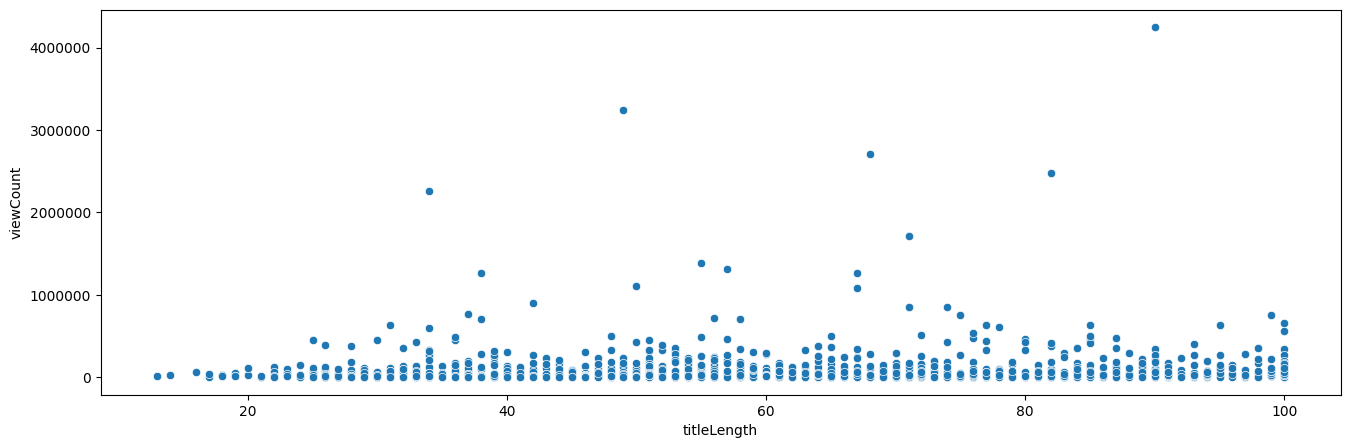

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
sns.scatterplot(data = video_df, x = "titleLength", y = "viewCount", ax=ax)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

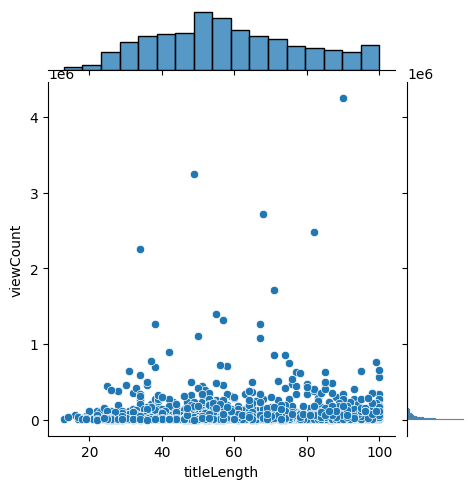

In [76]:
sns.jointplot(data = video_df, x = "titleLength", y = "viewCount", height=5)
plt.show()

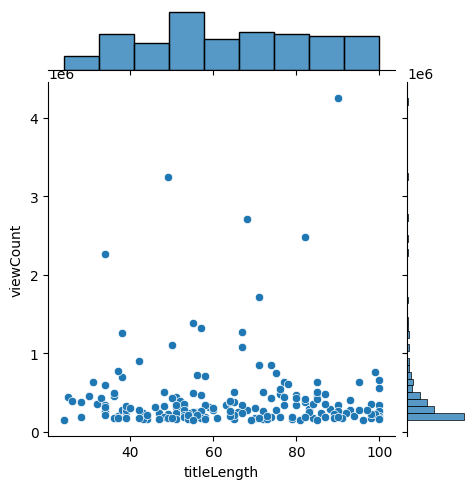

In [77]:
sns.jointplot(data = video_df[video_df['viewCount']>150000], x = "titleLength", y = "viewCount", height=5)
plt.show()

There is no relationship between tags number and views. Most published videos have about less than 3 tags. But if we observe the most viewed videos (more than 150k views), we note they have about 15-20 tags. So seems to be good about 15-20 tags.

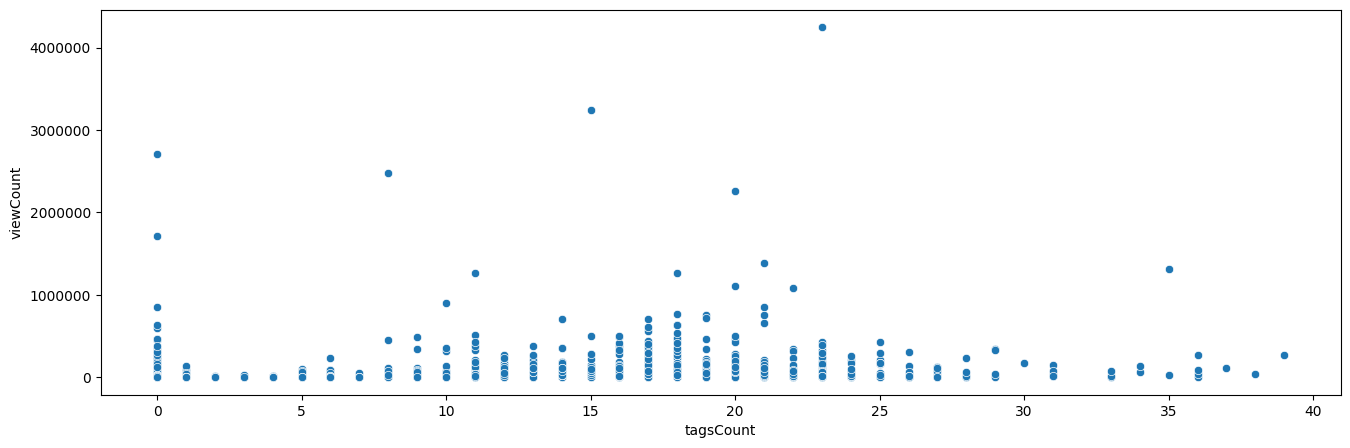

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
sns.scatterplot(data = video_df, x = "tagsCount", y = "viewCount", ax=ax)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

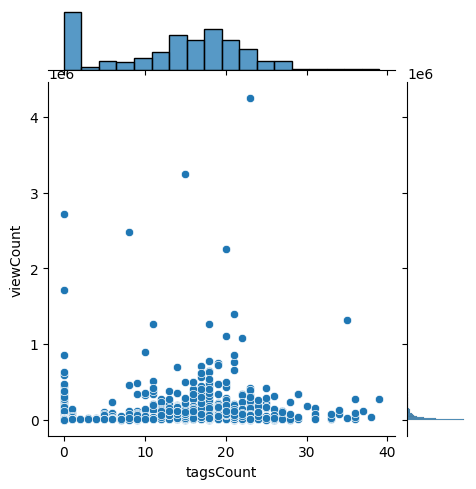

In [79]:
sns.jointplot(data = video_df, x = "tagsCount", y = "viewCount", height=5)
plt.show()

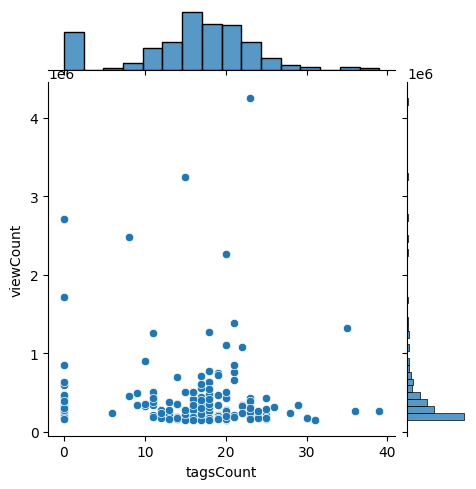

In [80]:
sns.jointplot(data = video_df[video_df['viewCount']>150000], x = "tagsCount", y = "viewCount", height=5)
plt.show()

##### Definition and captions

The 99.7% of videos in the dataframe has HD definition, so it rappresents the standard for youtube videos.
The video published without captions are many more than ones with captions, but the video with captions tend to have more view on average. The video views different is not so much, so maybe the effort could be not worth it.

In [81]:
video_df['definition'].value_counts()

definition
hd    1565
sd       4
Name: count, dtype: int64

<Axes: xlabel='definition'>

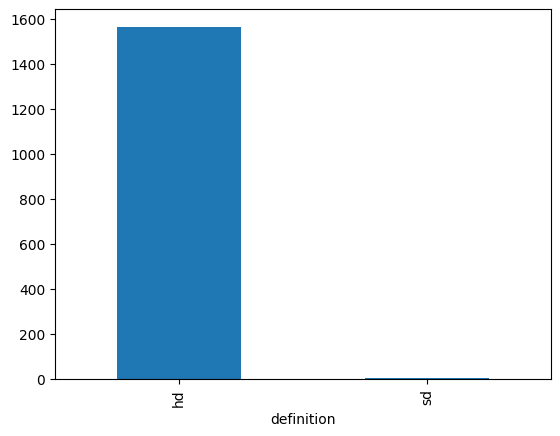

In [82]:
video_df['definition'].value_counts().plot.bar()

In [83]:
video_df['definition'].value_counts()['hd'] / video_df.shape[0]

0.9974506054811982

Text(0.5, 1.0, 'Mean viewCount for videoPublished with caption')

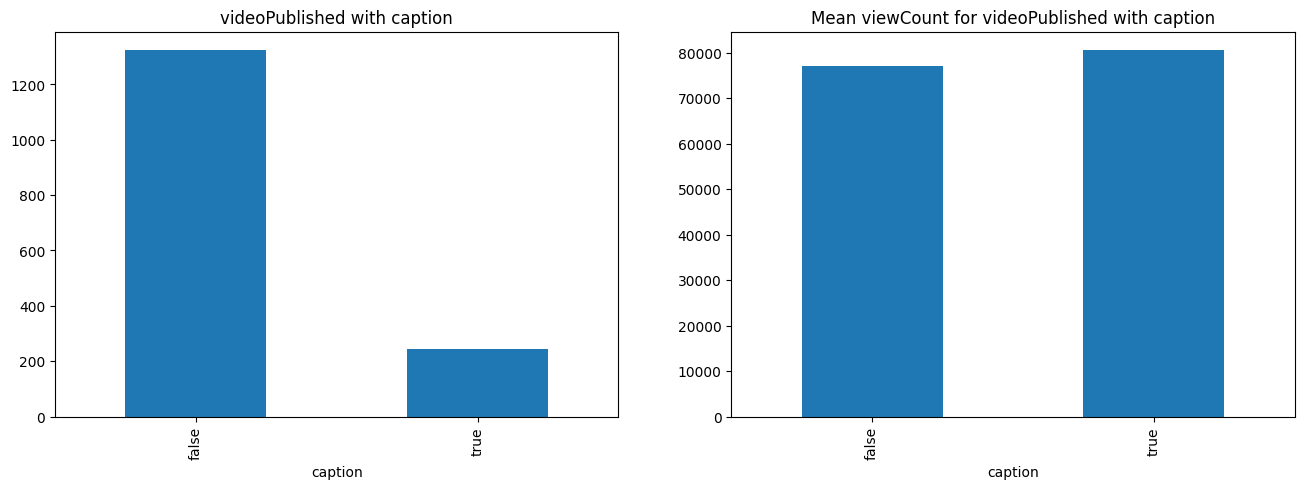

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
video_df['caption'].value_counts().plot.bar(ax=axs[0])
video_df.groupby('caption')['viewCount'].mean().plot.bar(ax=axs[1])
axs[0].set_title('videoPublished with caption')
axs[1].set_title('Mean viewCount for videoPublished with caption')

In [85]:
#check video views different average between video with captions and video without captions
video_df.groupby('caption')['viewCount'].mean()[1] - video_df.groupby('caption')['viewCount'].mean()[0]

3502.9395307972154

##### Conclusions

From above we can affirm that a good youtube video has:
- a number of like about 8.500;
- a number of comments about 360;
- a duration about 13 minutes (783 seconds); 
- a title length about 50 characters;
- a number of tags about 15-20; 
- a HD definition; 
- captions.

Also, it could be a good idea to upload the video on 8th or 17th of the month and on Wednesday or Sunday.

### Dataframe comments

The most of videos in the dataframe have at least 10 comments extracted.

The Dataframe comments will be explore with the Sentiment Analysis in the following paragraph.

In [86]:
#check number of comments
print('Total comments in comments_df: ', comments_df.numComments.sum())

# check number of videos 
print('Total video in comments_df: ', comments_df.shape[0])

# check for how many videos we have comments
print('Total video with 10 comments : ', comments_df[comments_df['numComments']==10].shape[0])

# check for how many videos we have less than 10 comments
print('Total video with less than 10 comments: ', comments_df[comments_df['numComments']<10].shape[0])


Total comments in comments_df:  16716
Total video in comments_df:  1825
Total video with 10 comments :  1509
Total video with less than 10 comments:  316


<Axes: xlabel='numComments'>

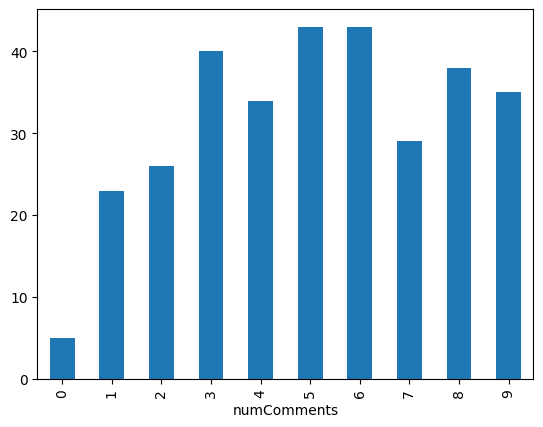

In [87]:
# check how many video there are for each numComments values where numComments is less than 10
comments_df[comments_df['numComments']<10].numComments.value_counts().sort_index().plot.bar()

## NLP & SENTIMENT ANALYSIS

In this paragraph I used some NATURAL LANGUAGE PROCESSING (NLP) techniques to analyse words in titles, descriptions  and comments of Youtube videos.

1. With wordlcoud libraries I showed with visual charts the most frequent words in titles, descriptions  and comments;
2. I find the most frequent words in titles, descriptions  and comments. First in all videos, then only in the top viewed videos;
3. I make a sentiment analysis to analyse text in comments to determine if the emotional tone of the message is positive, negative, or neutral. 

In [88]:
comments_df_nlp = comments_df.copy()

In [89]:
comments_df_nlp.head(3)

video_id  viewCount channelTitle  \
0  -JTU734oMfk       5246      Ken Jee   
1  HVpbmu7rFYE       3051      Ken Jee   
2  NQQ3DRdXAXE      13456      Ken Jee   

                                               title  titleLength  \
0                             Exciting Announcement!           22   
1                 AI: A Customer Service Revolution?           34   
2  Beginner Kaggle Data Science Project Walk-Thro...           81   

                                         description  \
0  #DataScience #KenJee \nBig news! I know I have...   
1  #DataScience #KenJee #ai \n\nThis past week I ...   
2  #DataScience #KenJee #kaggle \nKaggle Notebook...   

                                                tags  tagsCount  \
0  [Data Science, Ken Jee, Machine Learning, data...         16   
1  [Data Science, Ken Jee, Machine Learning, data...         13   
2  [Data Science, Ken Jee, Machine Learning, data...         20   

                                            comments  numComments  
0  [Check out the course bundle and FREE Github R...           10  
1  [Very interesting and inspiring👍, I really lik...           10  
2  [Kaggle Notebook (Housing): https://www.kaggle...           10

#### Wordclouds 

for words in titles, descriptions and comments

In [90]:
stop_words = set(stopwords.words('english'))

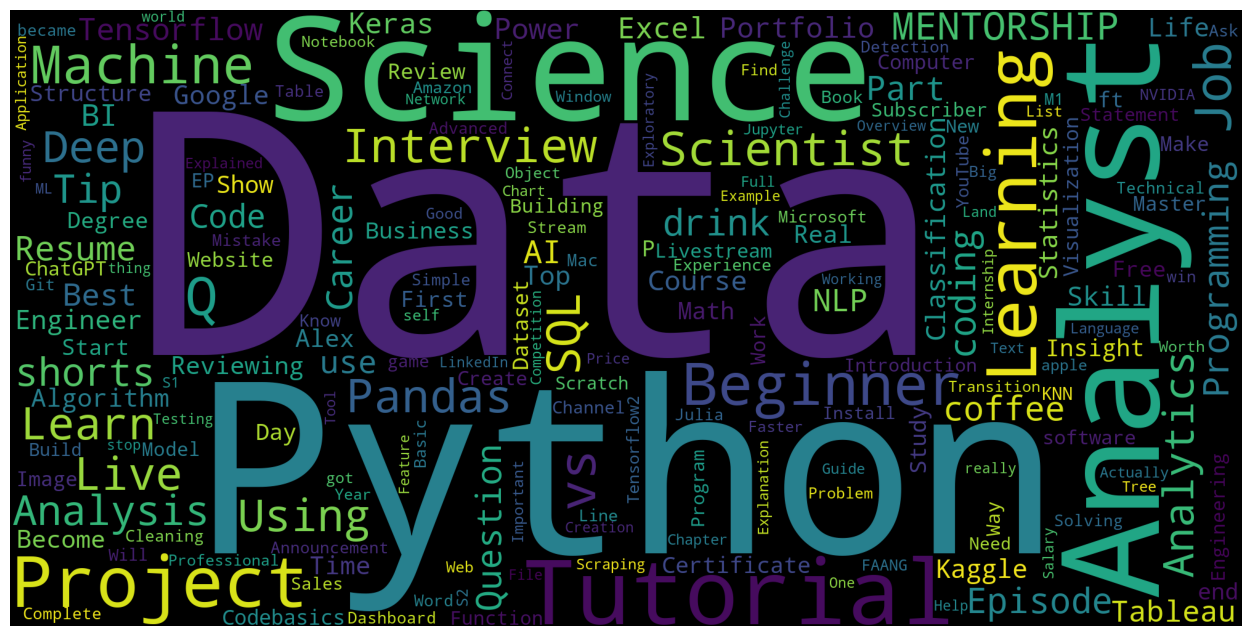

In [91]:
# Titles
comments_df_nlp['title_no_stopwords'] = comments_df_nlp['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
all_words_title = list([a for b in comments_df_nlp['title_no_stopwords'].tolist() for a in b])
all_words_title_str = ' '.join(all_words_title) 
wordcloud_title = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', colormap='viridis', collocations=False).generate(all_words_title_str)
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud_title) 
plt.axis("off");

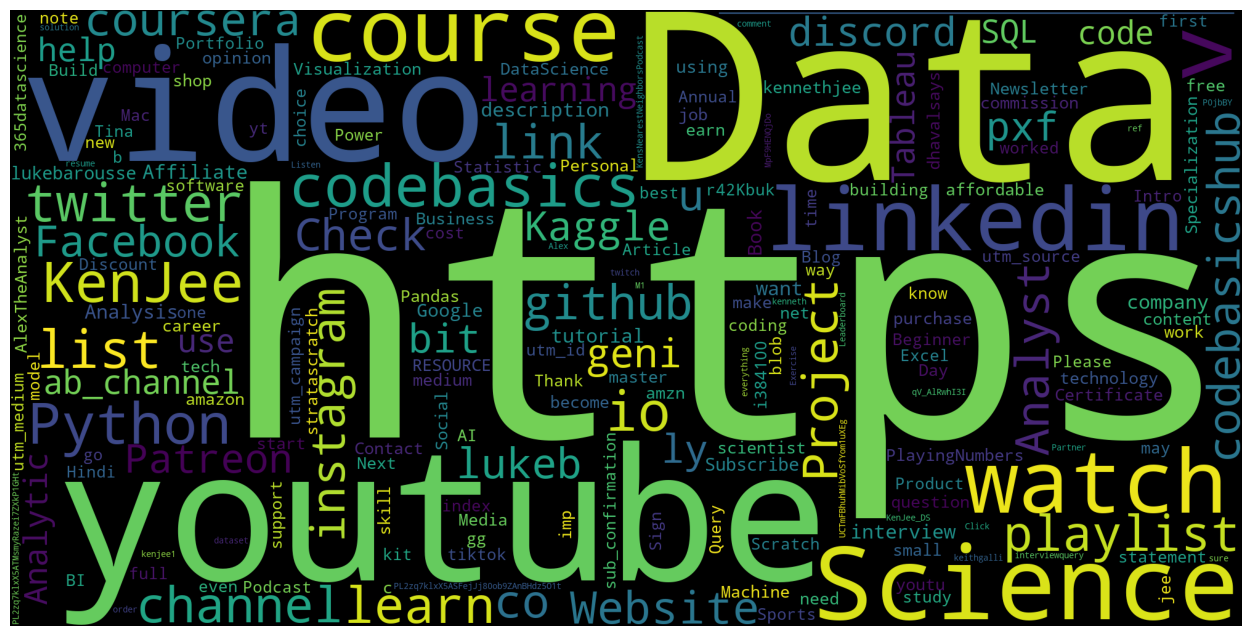

In [92]:
# Descriptions
comments_df_nlp['description_no_stopwords'] = comments_df_nlp['description'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
all_words_description = list([a for b in comments_df_nlp['description_no_stopwords'].tolist() for a in b])
all_words_description_str = ' '.join(all_words_description) 
wordcloud_description = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', colormap='viridis', collocations=False).generate(all_words_description_str)
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud_description) 
plt.axis("off");


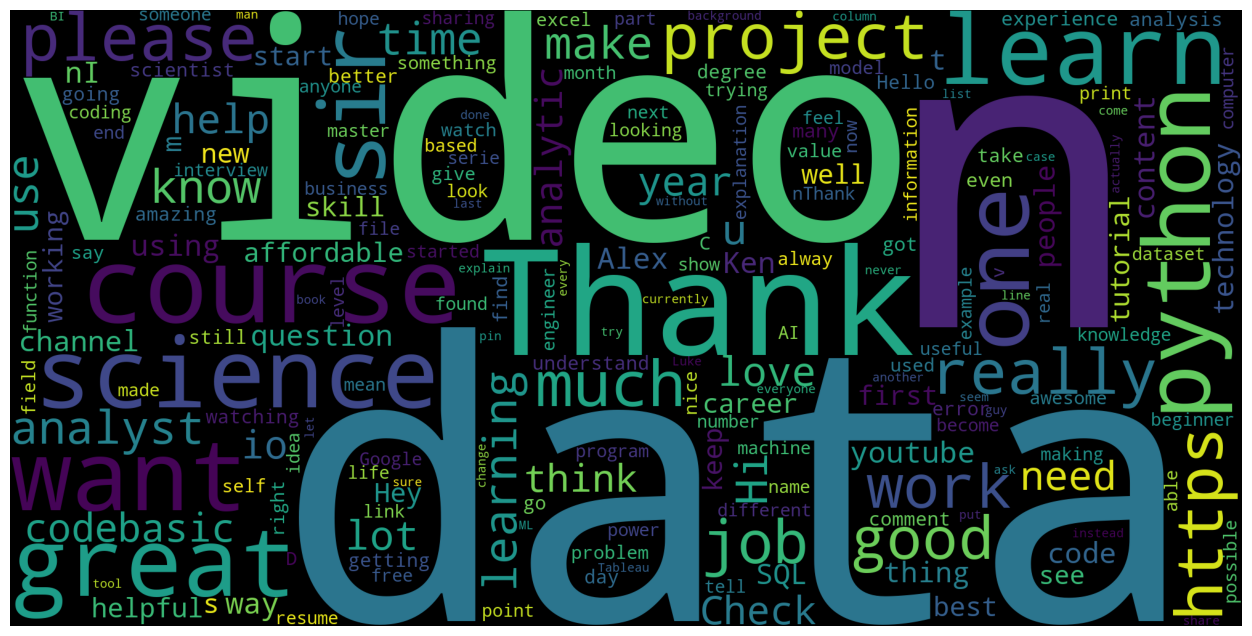

In [93]:
# Comments
comments_df_nlp['comments_no_stopwords'] = comments_df_nlp['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
all_words_comments = list([a for b in comments_df_nlp['comments_no_stopwords'].tolist() for a in b])
all_words_comments_str = ' '.join(all_words_comments) 
wordcloud_comments = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', colormap='viridis', collocations=False).generate(all_words_comments_str)
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud_comments) 
plt.axis("off");

#### Most used words

##### in all videos

Text(0.5, 1.0, 'most used words in titles')

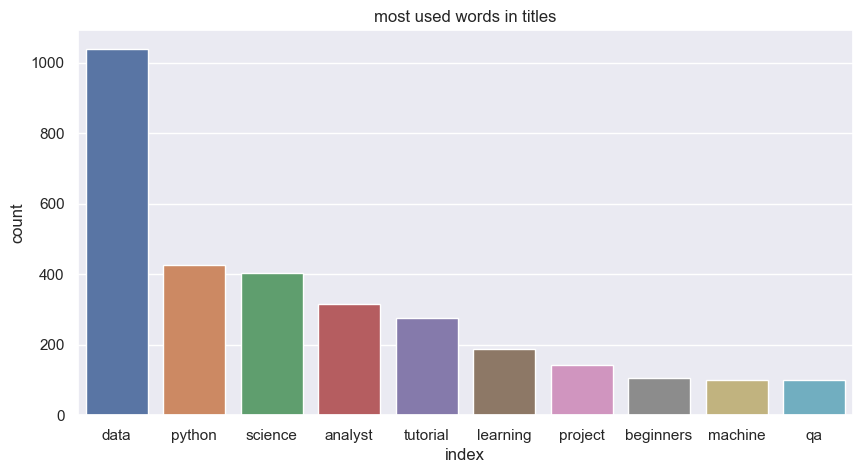

In [94]:
stop_words = set(stopwords.words('english'))

parole = []
for frase in comments_df_nlp['title']:
    frase = re.sub(r'[^\w\s]','',frase) #remove emoticons and special characters
    parole += [parola.lower() for parola in frase.split() if parola.lower() not in stop_words]

conteggio_parole = pd.Series(parole).value_counts().to_frame().reset_index()
conteggio_parole = conteggio_parole[conteggio_parole['index'].str.len() > 1]

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='index', y ='count', data=conteggio_parole[:10]).set_title('most used words in titles')

In [95]:
#make list of most used words
most_used_words = list(conteggio_parole[:10]['index'])

Text(0.5, 1.0, 'most used words in descriptions')

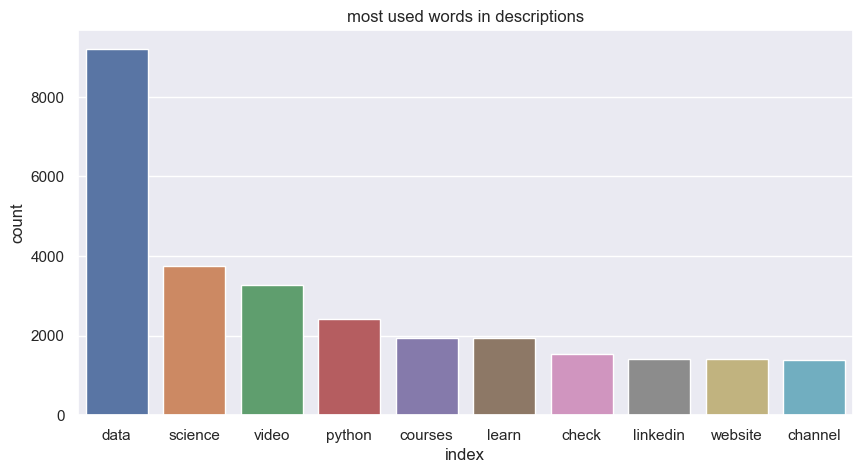

In [96]:
stop_words = set(stopwords.words('english'))

parole = []
for frase in comments_df_nlp['description']:
    frase = re.sub(r'[^\w\s]','',frase)     #remove emoticons and special characters
    parole += [parola.lower() for parola in frase.split() if parola.lower() not in stop_words]

conteggio_parole = pd.Series(parole).value_counts().to_frame().reset_index()
conteggio_parole = conteggio_parole[conteggio_parole['index'].str.len() > 1]

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='index', y ='count', data=conteggio_parole[:10]).set_title('most used words in descriptions')

In [97]:
#update list of most used words
for i in list(conteggio_parole[:10]['index']):
    most_used_words.append(i)

Text(0.5, 1.0, 'most used words in comments')

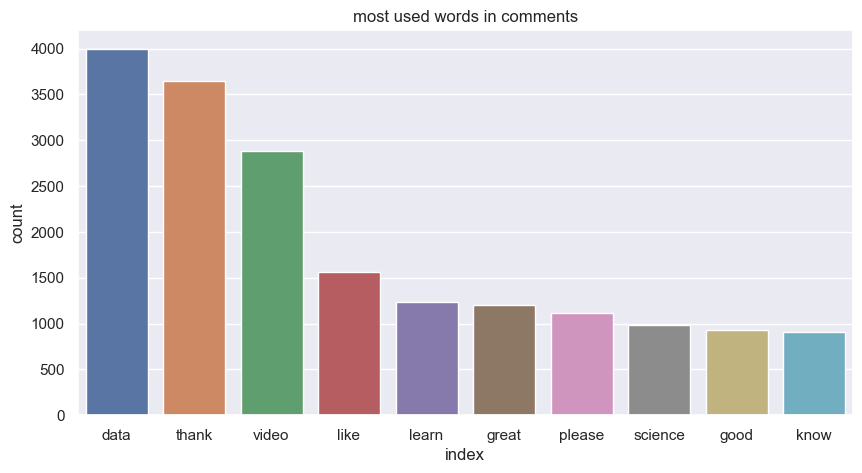

In [98]:
stop_words = set(stopwords.words('english'))
stop_words.update(["get", "would", "want", "i'm", "really","one","much"]) #remove meanless words

lemmatizer = WordNetLemmatizer()  #needed to convert words to their base form
parole = []
for lista in comments_df_nlp['comments']:
    for frase in lista:
        parole += [lemmatizer.lemmatize(parola.lower())  #convert words to their base form
                   if parola[-1] != 's' else lemmatizer.lemmatize(parola[:-1].lower()) #count plural words as singular words
                   for parola in frase.split() if parola.lower() not in stop_words]

conteggio_parole = pd.Series(parole).value_counts().to_frame().reset_index()

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='index', y ='count', data=conteggio_parole[:10]).set_title('most used words in comments')

In [99]:
#update list of most used words
for i in list(conteggio_parole[:10]['index']):
    most_used_words.append(i)

##### in top viewed videos

In [100]:
comments_df_nlp['viewCount'].describe()

count      1825.00
mean      84673.26
std      222142.98
min         474.00
25%        7605.00
50%       23343.00
75%       76887.00
max     4246068.00
Name: viewCount, dtype: float64

In [101]:
len(comments_df_nlp[comments_df_nlp['viewCount']>comments_df_nlp['viewCount'].mean()]['viewCount'])

418

Text(0.5, 1.0, 'most used words in titles (Top viewed videos)')

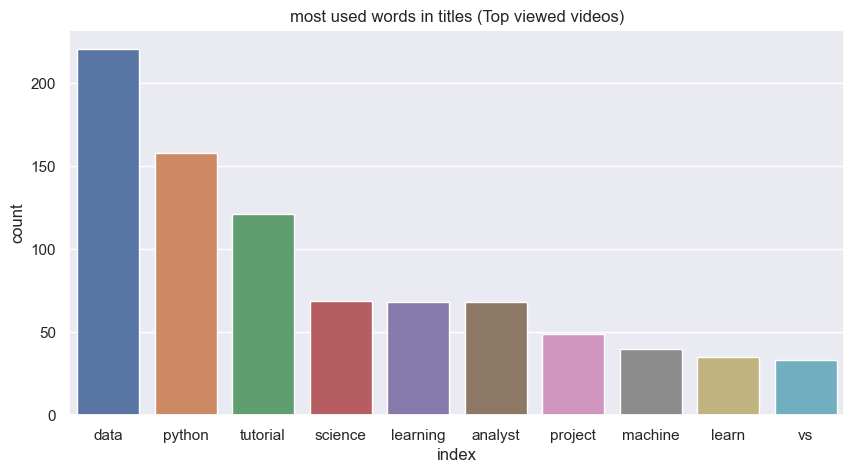

In [102]:
stop_words = set(stopwords.words('english'))

parole = []
for frase in comments_df_nlp[comments_df_nlp['viewCount']>comments_df_nlp['viewCount'].mean()]['title']:
    frase = re.sub(r'[^\w\s]','',frase) #remove emoticons and special characters
    parole += [parola.lower() for parola in frase.split() if parola.lower() not in stop_words]

conteggio_parole = pd.Series(parole).value_counts().to_frame().reset_index()
conteggio_parole = conteggio_parole[conteggio_parole['index'].str.len() > 1]

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='index', y ='count', data=conteggio_parole[:10]).set_title('most used words in titles (Top viewed videos)')

In [103]:
#update list of most used words
for i in list(conteggio_parole[:10]['index']):
    most_used_words.append(i)

Text(0.5, 1.0, 'most used words in descriptions (Top viewed videos)')

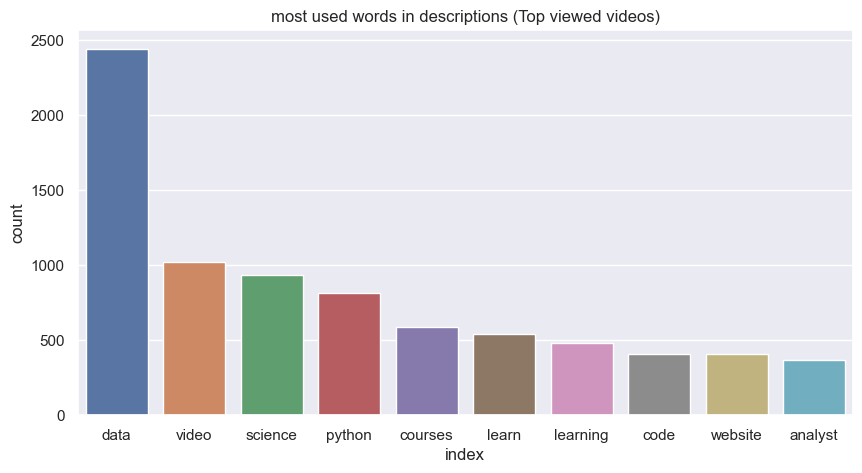

In [104]:
stop_words = set(stopwords.words('english'))

parole = []
for frase in comments_df_nlp[comments_df_nlp['viewCount']>comments_df_nlp['viewCount'].mean()]['description']:
    frase = re.sub(r'[^\w\s]','',frase)     #remove emoticons and special characters
    parole += [parola.lower() for parola in frase.split() if parola.lower() not in stop_words]

conteggio_parole = pd.Series(parole).value_counts().to_frame().reset_index()
conteggio_parole = conteggio_parole[conteggio_parole['index'].str.len() > 1]

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='index', y ='count', data=conteggio_parole[:10]).set_title('most used words in descriptions (Top viewed videos)')

In [105]:
#update list of most used words
for i in list(conteggio_parole[:10]['index']):
    most_used_words.append(i)

Text(0.5, 1.0, 'most used words in comments (Top viewed videos)')

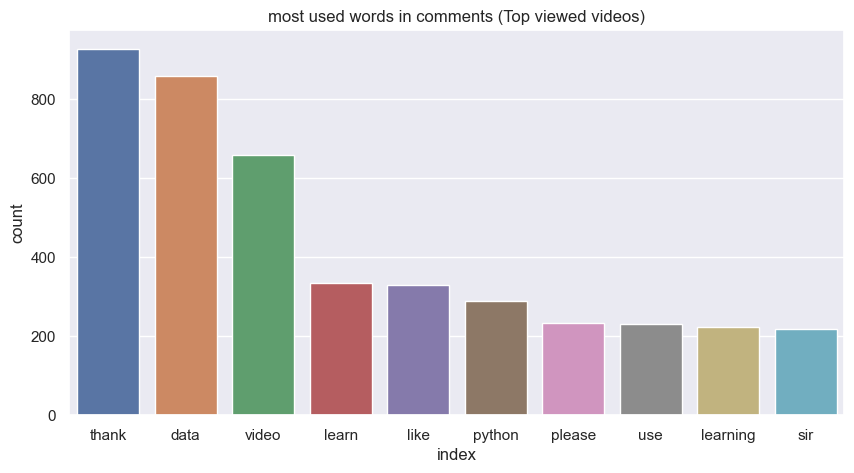

In [106]:
stop_words = set(stopwords.words('english'))
stop_words.update(["get", "would", "want", "i'm", "really","one","much"]) #remove meanless words

lemmatizer = WordNetLemmatizer()  #needed to convert words to their base form
parole = []
for lista in comments_df_nlp[comments_df_nlp['viewCount']>comments_df_nlp['viewCount'].mean()]['comments']:
    for frase in lista:
        parole += [lemmatizer.lemmatize(parola.lower())  #convert words to their base form
                   if parola[-1] != 's' else lemmatizer.lemmatize(parola[:-1].lower()) #count plural words as singular words
                   for parola in frase.split() if parola.lower() not in stop_words]

conteggio_parole = pd.Series(parole).value_counts().to_frame().reset_index()

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='index', y ='count', data=conteggio_parole[:10]).set_title('most used words in comments (Top viewed videos)')

In [107]:
#update list of most used words
for i in list(conteggio_parole[:10]['index']):
    most_used_words.append(i)

In [108]:
most_used_words = list(dict.fromkeys(most_used_words)) #remove duplicates
print(most_used_words)

['data', 'python', 'science', 'analyst', 'tutorial', 'learning', 'project', 'beginners', 'machine', 'qa', 'video', 'courses', 'learn', 'check', 'linkedin', 'website', 'channel', 'thank', 'like', 'great', 'please', 'good', 'know', 'vs', 'code', 'use', 'sir']


#### Classifyng comments

In [109]:
#to get polarity value
def get_polarity(twt):
    return TextBlob(twt).sentiment.polarity

#to assign a category base on polarity value
def get_sentiment(score):
    if score <0:
        return 'negative'
    if score ==0:
        return 'neutral'
    if score >0:
        return 'positive'

In [110]:
#make list with comments
comments = []
for list_comments in comments_df_nlp['comments']:
    for comment in list_comments:
        comments.append(comment)

#make a df with comment, polarity and sentiment
comments_df_sentiment = pd.DataFrame({'comments':comments})
comments_df_sentiment['Polarity'] = comments_df_sentiment['comments'].apply(get_polarity)
comments_df_sentiment['Sentiment'] = comments_df_sentiment['Polarity'].apply(get_sentiment)
comments_df_sentiment

comments  Polarity Sentiment
0      Check out the course bundle and FREE Github Re...      0.28  positive
1      There are so many free recources everywhere. N...      0.27  positive
2                New Nice Be-Ken-nnings! \n🥵 initiative!      0.54  positive
3                              Is the course in python??      0.00   neutral
4              Say less. Take my money already, Kenneth.     -0.17  negative
...                                                  ...       ...       ...
16711                        Can I do in my mobile phone      0.00   neutral
16712  And sir after written wrong sentence its not e...     -0.17  negative
16713  What is the meaning of add to path\nIn my lapt...      0.75  positive
16714  how did u type exponential C command to come t...      0.00   neutral
16715             i have a chromebook how can i download      0.00   neutral

[16716 rows x 3 columns]

<Axes: xlabel='Sentiment'>

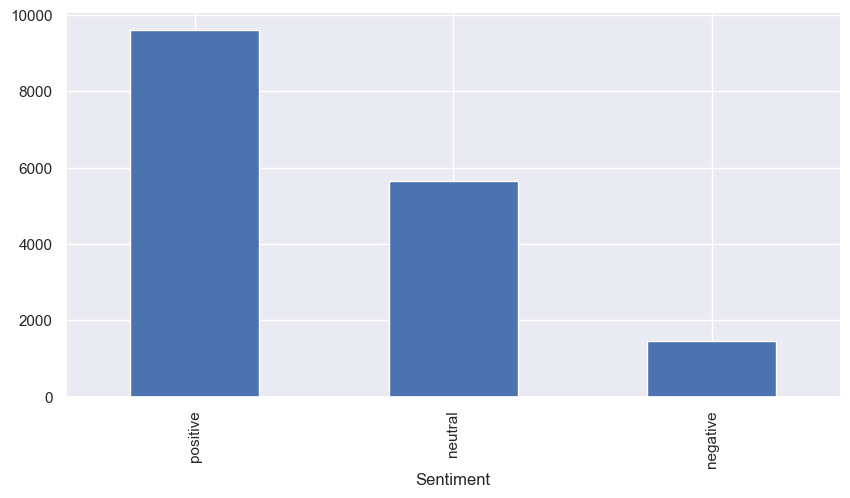

In [111]:
comments_df_sentiment['Sentiment'].value_counts().plot.bar()

#### Conclusions

As we could expected the most frequent words are related to data science worlds: 'data', 'python', 'science', 'analyst', 'machine', 'code'.

There also a lot of words related to world of teaching: 'tutorial', 'learning', 'project', 'beginners', 'qa', 'learn', 'know', 'vs'.

There are also expressions of gratitude from the followers: 'thank', 'like', 'great', 'please', 'good'.

A particolur word is 'please' maybe used to request something (i.e. new videos, likes, subscriptions..).

From sentiment analysis we noted there is a positive emotion in comments, that means there is great potential to develop community with uploading new videos.

In [112]:
print(most_used_words)

['data', 'python', 'science', 'analyst', 'tutorial', 'learning', 'project', 'beginners', 'machine', 'qa', 'video', 'courses', 'learn', 'check', 'linkedin', 'website', 'channel', 'thank', 'like', 'great', 'please', 'good', 'know', 'vs', 'code', 'use', 'sir']


## FUTURE APPLICATIONS

For future application it could be useful to extract the data daily, so it could be possible to analyse the trend of how the Youtube channel get subscribers, views, likes and comments during the time.

So I made the dataframe `channel_data_today` with all Youtube channel data of the current day and saved it in a folder as a csv.

The next step will be to import all the csv files and to concant them in one dataframe (I called it as `channel_data_trend`).

Because Youtube API extracs data as 'year to date', it's necessary to run the following cells daily.

**N.B.** Before to run following cells, it's also necessary to follow first the steps in the introduction of this notebook:
- import libraries;
- create an API client;
- import functions
- make a list of Youtube channel IDs.

In [113]:
# run this cell to make channel_data_today df and save it in a csv file

# get channel data
channel_data_today = function.get_channel_stats(youtube, channel_ids)

# convert count columns to numeric columns
numeric_cols = ['subscribers', 'views', 'totalVideos']
channel_data_today[numeric_cols] = channel_data_today[numeric_cols].apply(pd.to_numeric, errors='coerce')

# get views and likes data
video_df_today = pd.DataFrame()
for c in channel_data_today['channelName'].unique():
    playlist_id = channel_data_today.loc[channel_data_today['channelName']== c, 'playlistId'].iloc[0]
    video_ids = function.get_video_ids(youtube, playlist_id)
    # get video data
    video_data = function.get_video_details(youtube, video_ids)
    # append video data together
    video_df_today = pd.concat([video_df_today, video_data])

# convert like and comment in int
video_df_today['likeCount'] = video_df_today['likeCount'].astype(int)
video_df_today['commentCount'] = video_df_today['commentCount'].astype(int)

# join views and likes data
channel_data_today = channel_data_today.join(video_df_today.groupby('channelTitle')[['likeCount', 'commentCount']].sum(), on='channelName', how='left')

# delete columns
channel_data_today.drop(['playlistId', 'createdAt'], axis=1, inplace=True)

# rename columns
channel_data_today = channel_data_today.rename(columns={'totalVideos': 'videos',
                                                        'likeCount': 'likes',
                                                        'commentCount': 'comments'
                                                        })

# add today date columns
channel_data_today['date'] = date.today()

channel_data_today.to_csv('csv_byDays/channel_data_'+str(date.today())+'.csv', index=False)

In [114]:
# run this cell to concat all csv files

path = r'csv_byDays/'
all_files = os.listdir(path)

li = []

for filename in all_files:
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, filename), index_col=None, header=0)
        li.append(df)

channel_data_trend = pd.concat(li, axis=0, ignore_index=True)

channel_data_trend = channel_data_trend.sort_values(by=['channelName','date'], ascending=True)
channel_data_trend = channel_data_trend.reset_index(drop=True)

In [115]:
channel_data_trend.head(8)

channelName  subscribers     views  videos   likes  comments  \
0  Alex The Analyst       508000  20338784     219  583369     42325   
1  Alex The Analyst       509000  20369573     219  584305     42389   
2  Alex The Analyst       510000  20397551     219  584974     42393   
3  Alex The Analyst       510000  20425366     219  585404     42415   
4      Data With Mo        33800    900934      22   35669      2324   
5      Data With Mo        34100    905333      22   35929      2343   
6      Data With Mo        34300    910080      22   36112      2358   
7      Data With Mo        34400    915403      22   36267      2367   

         date  
0  2023-06-30  
1  2023-07-01  
2  2023-07-02  
3  2023-07-03  
4  2023-06-30  
5  2023-07-01  
6  2023-07-02  
7  2023-07-03